In [169]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [170]:
#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_columns', 50)

## Examining different reward functions
1. Average change in area across plants
2. Median change in area across plants

### Data Processing

In [171]:
path = os.path.dirname(os.path.abspath("")) + '/analysis/plant_data/plant_area_data.csv'
df = pd.read_csv(path).sort_values(by='timestamp')
df.columns = df.columns.str.replace(' ', '_')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
df.head(300)

timestamp  plant_1_(4-12-7)  plant_2_(4-12-7)  plant_3_(4-12-7)  \
0   2024-02-10 09:00:00             559.0             439.0             335.0   
1   2024-02-10 09:10:00             548.0             390.0             338.0   
2   2024-02-10 09:20:00             560.0             426.0             328.0   
3   2024-02-10 09:30:00             549.0             438.0             342.0   
4   2024-02-10 09:40:00             561.0             444.0             353.0   
..                  ...               ...               ...               ...   
295 2024-02-14 10:10:00            1514.0            1268.0             904.0   
296 2024-02-14 10:20:00            1507.0            1302.0             897.0   
297 2024-02-14 10:30:00            1510.0            1315.0             919.0   
298 2024-02-14 10:40:00            1473.0            1321.0             906.0   
299 2024-02-14 10:50:00            1523.0            1290.0             895.0   

     plant_4_(4-12-7)  plant_5_(4-12-7)  plant_6_(4-12-7)  plant_7_(4-12-7)  \
0               370.0             302.0             353.0             373.0   
1               363.0             302.0             277.0             336.0   
2               371.0             303.0             275.0             365.0   
3               367.0             296.0             266.0             370.0   
4               376.0             308.0             272.0             372.0   
..                ...               ...               ...               ...   
295            1128.0             973.0            1039.0            1062.0   
296            1115.0             968.0             991.0            1081.0   
297            1135.0            1001.0            1037.0            1065.0   
298            1144.0             947.0             995.0            1077.0   
299            1107.0             989.0            1014.0            1034.0   

     plant_8_(4-12-7)  plant_9_(10-6)  plant_10_(10-6)  plant_11_(10-6)  \
0               267.0           289.0            417.0            355.0   
1               224.0           275.0            410.0            362.0   
2               240.0           284.0            417.0            356.0   
3               248.0           284.0            420.0            356.0   
4               257.0           281.0            423.0            361.0   
..                ...             ...              ...              ...   
295             938.0           742.0           1033.0            970.0   
296             970.0           741.0           1034.0            958.0   
297             945.0           733.0           1022.0            962.0   
298             980.0           730.0           1027.0            929.0   
299             988.0           743.0           1025.0            955.0   

     plant_12_(10-6)  plant_13_(10-6)  plant_14_(10-6)  plant_15_(10-6)  \
0              457.0            300.0            397.0            444.0   
1              465.0            311.0            408.0            431.0   
2              461.0            319.0            405.0            440.0   
3              464.0            310.0            404.0            434.0   
4              466.0            316.0            414.0            445.0   
..               ...              ...              ...              ...   
295           1330.0            902.0           1192.0           1023.0   
296           1310.0            906.0           1178.0           1022.0   
297           1313.0            918.0           1188.0           1027.0   
298           1324.0            899.0           1182.0           1010.0   
299           1315.0            891.0           1179.0           1017.0   

     plant_16_(10-6)  plant_17_(12-2)  plant_18_(12-2)  plant_19_(12-2)  \
0              455.0            287.0            480.0            404.0   
1              463.0            285.0            487.0            412.0   
2              463.0            292.0            482.0           

In [172]:
# Get normalized area by subtracting each plants starting area from all area observations
plant_cols = df.columns.difference(['timestamp'])
df_norm = df.copy()
df_norm.loc[:, plant_cols] = df_norm.loc[:, plant_cols].div(df_norm.loc[0, plant_cols]).to_numpy(dtype=float)
df_norm['median_area'] = df_norm.loc[:, plant_cols].median(axis=1)
df_norm['mean_area'] = df_norm.loc[:, plant_cols].mean(axis=1)
df_norm

timestamp  plant_1_(4-12-7)  plant_2_(4-12-7)  \
0    2024-02-10 09:00:00          1.000000          1.000000   
1    2024-02-10 09:10:00          0.980322          0.888383   
2    2024-02-10 09:20:00          1.001789          0.970387   
3    2024-02-10 09:30:00          0.982111          0.997722   
4    2024-02-10 09:40:00          1.003578          1.011390   
...                  ...               ...               ...   
1147 2024-02-25 20:10:00         20.905188         29.164009   
1148 2024-02-25 20:20:00         20.917710         29.225513   
1149 2024-02-25 20:30:00         20.966011         29.177677   
1150 2024-02-25 20:40:00         20.946333         29.371298   
1151 2024-02-25 20:50:00         20.966011         29.407745   

      plant_3_(4-12-7)  plant_4_(4-12-7)  plant_5_(4-12-7)  plant_6_(4-12-7)  \
0             1.000000          1.000000          1.000000          1.000000   
1             1.008955          0.981081          1.000000          0.784703   
2             0.979104          1.002703          1.003311          0.779037   
3             1.020896          0.991892          0.980132          0.753541   
4             1.053731          1.016216          1.019868          0.770538   
...                ...               ...               ...               ...   
1147         22.773134         23.994595         29.652318         25.968839   
1148         22.782090         23.940541         29.652318         26.280453   
1149         22.889552         24.097297         30.096026         26.736544   
1150         22.728358         24.148649         29.688742         26.288952   
1151         22.746269         24.062162         30.066225         26.668555   

      plant_7_(4-12-7)  plant_8_(4-12-7)  plant_9_(10-6)  plant_10_(10-6)  \
0             1.000000          1.000000        1.000000         1.000000   
1             0.900804          0.838951        0.951557         0.983213   
2             0.978552          0.898876        0.982699         1.000000   
3             0.991957          0.928839        0.982699         1.007194   
4             0.997319          0.962547        0.972318         1.014388   
...                ...               ...             ...              ...   
1147         24.721180         33.352060       23.574394        21.894484   
1148         22.927614         28.520599       23.726644        22.043165   
1149         24.201072         32.913858       23.733564        22.043165   
1150         23.101877         31.823970       23.837370        22.110312   
1151         22.664879         27.434457       23.813149        22.153477   

      plant_11_(10-6)  plant_12_(10-6)  plant_13_(10-6)  plant_14_(10-6)  \
0            1.000000         1.000000         1.000000         1.000000   
1            1.019718         1.017505         1.036667         1.027708   
2            1.002817         1.008753         1.063333         1.020151   
3            1.002817         1.015317         1.033333         1.017632   
4            1.016901         1.019694         1.053333         1.042821   
...               ...              ...              ...              ...   
1147        22.991549        23.304158        23.256667        24.969773   
1148        23.061972        23.347921        23.213333        24.989924   
1149        23.092958        23.319475        23.300000        25.045340   
1150        23.216901        23.356674        23.306667        25.158690   
1151        23.346479        23.398249        23.343333        25.181360   

      plant_15_(10-6)  plant_16_(10-6)  plant_17_(12-2)  plant_18_(12-2)  \
0            1.000000         1.000000         1.000000         1.000000   
1            0.970721         1.017582         0.993031         1.014583   
2            0.990991         1.017582         1.017422         1.004167   
3            0.977477         1.032967         1.027875         1.014583   
4            1.002252         1.052747         1.024390         1.0

In [173]:
# Get change in normalized area at each timestep
delta_df = df_norm.copy()
delta_df.loc[:, plant_cols] = delta_df.loc[:, plant_cols].diff()
delta_df = delta_df.iloc[1:]
# Get median and mean change across all plants for each row
delta_df['median_change'] = delta_df.loc[:, plant_cols].median(axis=1)
delta_df['mean_change'] = delta_df.loc[:, plant_cols].mean(axis=1)
delta_df

timestamp  plant_1_(4-12-7)  plant_2_(4-12-7)  \
1    2024-02-10 09:10:00         -0.019678         -0.111617   
2    2024-02-10 09:20:00          0.021467          0.082005   
3    2024-02-10 09:30:00         -0.019678          0.027335   
4    2024-02-10 09:40:00          0.021467          0.013667   
5    2024-02-10 09:50:00         -0.005367         -0.025057   
...                  ...               ...               ...   
1147 2024-02-25 20:10:00          0.021467          0.095672   
1148 2024-02-25 20:20:00          0.012522          0.061503   
1149 2024-02-25 20:30:00          0.048301         -0.047836   
1150 2024-02-25 20:40:00         -0.019678          0.193622   
1151 2024-02-25 20:50:00          0.019678          0.036446   

      plant_3_(4-12-7)  plant_4_(4-12-7)  plant_5_(4-12-7)  plant_6_(4-12-7)  \
1             0.008955         -0.018919          0.000000         -0.215297   
2            -0.029851          0.021622          0.003311         -0.005666   
3             0.041791         -0.010811         -0.023179         -0.025496   
4             0.032836          0.024324          0.039735          0.016997   
5            -0.029851          0.008108          0.006623          0.039660   
...                ...               ...               ...               ...   
1147          0.152239          0.018919         -0.162252         -0.172805   
1148          0.008955         -0.054054          0.000000          0.311615   
1149          0.107463          0.156757          0.443709          0.456091   
1150         -0.161194          0.051351         -0.407285         -0.447592   
1151          0.017910         -0.086486          0.377483          0.379603   

      plant_7_(4-12-7)  plant_8_(4-12-7)  plant_9_(10-6)  plant_10_(10-6)  \
1            -0.099196         -0.161049       -0.048443        -0.016787   
2             0.077748          0.059925        0.031142         0.016787   
3             0.013405          0.029963        0.000000         0.007194   
4             0.005362          0.033708       -0.010381         0.007194   
5            -0.032172         -0.011236       -0.010381         0.000000   
...                ...               ...             ...              ...   
1147          2.115282          4.921348        0.044983        -0.067146   
1148         -1.793566         -4.831461        0.152249         0.148681   
1149          1.273458          4.393258        0.006920         0.000000   
1150         -1.099196         -1.089888        0.103806         0.067146   
1151         -0.436997         -4.389513       -0.024221         0.043165   

      plant_11_(10-6)  plant_12_(10-6)  plant_13_(10-6)  plant_14_(10-6)  \
1            0.019718         0.017505         0.036667         0.027708   
2           -0.016901        -0.008753         0.026667        -0.007557   
3            0.000000         0.006565        -0.030000        -0.002519   
4            0.014085         0.004376         0.020000         0.025189   
5            0.011268         0.017505        -0.020000         0.000000   
...               ...              ...              ...              ...   
1147        -0.146479        -0.050328         0.036667         0.007557   
1148         0.070423         0.043764        -0.043333         0.020151   
1149         0.030986        -0.028446         0.086667         0.055416   
1150         0.123944         0.037199         0.006667         0.113350   
1151         0.129577         0.041575         0.036667         0.022670   

      plant_15_(10-6)  plant_16_(10-6)  plant_17_(12-2)  plant_18_(12-2)  \
1           -0.029279         0.017582        -0.006969         0.014583   
2            0.020270         0.000000         0.024390        -0.010417   
3           -0.013514         0.015385         0.010453         0.010417   
4            0.024775         0.019780        -0.003484         0.010417   
5           -0.018018        -0.006593         0.027875        -0.0

In [174]:
# Get moving window average of past 10 entries for normalized area for all plants
window_size = 10
for col in plant_cols:
    df_norm[f'{col}_window_avg'] = df_norm[col].rolling(window=window_size, min_periods=1, center=True).mean()
df_norm

timestamp  plant_1_(4-12-7)  plant_2_(4-12-7)  \
0    2024-02-10 09:00:00          1.000000          1.000000   
1    2024-02-10 09:10:00          0.980322          0.888383   
2    2024-02-10 09:20:00          1.001789          0.970387   
3    2024-02-10 09:30:00          0.982111          0.997722   
4    2024-02-10 09:40:00          1.003578          1.011390   
...                  ...               ...               ...   
1147 2024-02-25 20:10:00         20.905188         29.164009   
1148 2024-02-25 20:20:00         20.917710         29.225513   
1149 2024-02-25 20:30:00         20.966011         29.177677   
1150 2024-02-25 20:40:00         20.946333         29.371298   
1151 2024-02-25 20:50:00         20.966011         29.407745   

      plant_3_(4-12-7)  plant_4_(4-12-7)  plant_5_(4-12-7)  plant_6_(4-12-7)  \
0             1.000000          1.000000          1.000000          1.000000   
1             1.008955          0.981081          1.000000          0.784703   
2             0.979104          1.002703          1.003311          0.779037   
3             1.020896          0.991892          0.980132          0.753541   
4             1.053731          1.016216          1.019868          0.770538   
...                ...               ...               ...               ...   
1147         22.773134         23.994595         29.652318         25.968839   
1148         22.782090         23.940541         29.652318         26.280453   
1149         22.889552         24.097297         30.096026         26.736544   
1150         22.728358         24.148649         29.688742         26.288952   
1151         22.746269         24.062162         30.066225         26.668555   

      plant_7_(4-12-7)  plant_8_(4-12-7)  plant_9_(10-6)  plant_10_(10-6)  \
0             1.000000          1.000000        1.000000         1.000000   
1             0.900804          0.838951        0.951557         0.983213   
2             0.978552          0.898876        0.982699         1.000000   
3             0.991957          0.928839        0.982699         1.007194   
4             0.997319          0.962547        0.972318         1.014388   
...                ...               ...             ...              ...   
1147         24.721180         33.352060       23.574394        21.894484   
1148         22.927614         28.520599       23.726644        22.043165   
1149         24.201072         32.913858       23.733564        22.043165   
1150         23.101877         31.823970       23.837370        22.110312   
1151         22.664879         27.434457       23.813149        22.153477   

      plant_11_(10-6)  plant_12_(10-6)  plant_13_(10-6)  plant_14_(10-6)  \
0            1.000000         1.000000         1.000000         1.000000   
1            1.019718         1.017505         1.036667         1.027708   
2            1.002817         1.008753         1.063333         1.020151   
3            1.002817         1.015317         1.033333         1.017632   
4            1.016901         1.019694         1.053333         1.042821   
...               ...              ...              ...              ...   
1147        22.991549        23.304158        23.256667        24.969773   
1148        23.061972        23.347921        23.213333        24.989924   
1149        23.092958        23.319475        23.300000        25.045340   
1150        23.216901        23.356674        23.306667        25.158690   
1151        23.346479        23.398249        23.343333        25.181360   

      plant_15_(10-6)  plant_16_(10-6)  plant_17_(12-2)  plant_18_(12-2)  \
0            1.000000         1.000000         1.000000         1.000000   
1            0.970721         1.017582         0.993031         1.014583   
2            0.990991         1.017582         1.017422         1.004167   
3            0.977477         1.032967         1.027875         1.014583   
4            1.002252         1.052747         1.024390         1.0

In [175]:
# Get areas and window avergaes of area from 1 day prior and compute differences between current area and these values. 
# Note that we drop the first day since it does not have a previous day. 
lagged_plant_cols = {
    f'{col}_lagged': df_norm[col].shift(periods=72)
    for col in plant_cols
}
lagged_window_avg = {
    f'{col}_window_avg_lagged': df_norm[f'{col}_window_avg'].shift(periods=72)
    for col in plant_cols
}
lagged_delta = {
    f'{col}_lagged_delta': df_norm[col] - lagged_plant_cols[f'{col}_lagged'] 
    for col in plant_cols
}
window_avg_lagged_delta = {
    f'{col}_window_avg_lagged_delta': df_norm[col] - lagged_window_avg[f'{col}_window_avg_lagged'] 
    for col in plant_cols
}

df_norm_lag = pd.concat(
    [
        df_norm, 
        pd.DataFrame(lagged_plant_cols), 
        pd.DataFrame(lagged_window_avg),
        pd.DataFrame(lagged_delta),
        pd.DataFrame(window_avg_lagged_delta)
    ], 
    axis=1
).iloc[72:]

df_norm_lag

timestamp  plant_1_(4-12-7)  plant_2_(4-12-7)  \
72   2024-02-11 09:00:00          1.262970          1.359909   
73   2024-02-11 09:10:00          1.243292          1.332574   
74   2024-02-11 09:20:00          1.250447          1.348519   
75   2024-02-11 09:30:00          1.220036          1.343964   
76   2024-02-11 09:40:00          1.279070          1.348519   
...                  ...               ...               ...   
1147 2024-02-25 20:10:00         20.905188         29.164009   
1148 2024-02-25 20:20:00         20.917710         29.225513   
1149 2024-02-25 20:30:00         20.966011         29.177677   
1150 2024-02-25 20:40:00         20.946333         29.371298   
1151 2024-02-25 20:50:00         20.966011         29.407745   

      plant_3_(4-12-7)  plant_4_(4-12-7)  plant_5_(4-12-7)  plant_6_(4-12-7)  \
72            1.441791          1.310811          1.321192          1.099150   
73            1.408955          1.300000          1.364238          1.059490   
74            1.438806          1.308108          1.367550          1.118980   
75            1.388060          1.318919          1.357616          1.093484   
76            1.405970          1.302703          1.417219          1.084986   
...                ...               ...               ...               ...   
1147         22.773134         23.994595         29.652318         25.968839   
1148         22.782090         23.940541         29.652318         26.280453   
1149         22.889552         24.097297         30.096026         26.736544   
1150         22.728358         24.148649         29.688742         26.288952   
1151         22.746269         24.062162         30.066225         26.668555   

      plant_7_(4-12-7)  plant_8_(4-12-7)  plant_9_(10-6)  plant_10_(10-6)  \
72            1.324397          1.299625        1.259516         1.282974   
73            1.268097          1.389513        1.211073         1.268585   
74            1.308311          1.404494        1.211073         1.290168   
75            1.227882          1.411985        1.179931         1.292566   
76            1.335121          1.404494        1.217993         1.297362   
...                ...               ...             ...              ...   
1147         24.721180         33.352060       23.574394        21.894484   
1148         22.927614         28.520599       23.726644        22.043165   
1149         24.201072         32.913858       23.733564        22.043165   
1150         23.101877         31.823970       23.837370        22.110312   
1151         22.664879         27.434457       23.813149        22.153477   

      plant_11_(10-6)  plant_12_(10-6)  plant_13_(10-6)  plant_14_(10-6)  \
72           1.349296         1.328228         1.366667         1.350126   
73           1.354930         1.317287         1.400000         1.347607   
74           1.383099         1.339168         1.443333         1.395466   
75           1.354930         1.301969         1.436667         1.370277   
76           1.377465         1.319475         1.453333         1.352645   
...               ...              ...              ...              ...   
1147        22.991549        23.304158        23.256667        24.969773   
1148        23.061972        23.347921        23.213333        24.989924   
1149        23.092958        23.319475        23.300000        25.045340   
1150        23.216901        23.356674        23.306667        25.158690   
1151        23.346479        23.398249        23.343333        25.181360   

      plant_15_(10-6)  plant_16_(10-6)  plant_17_(12-2)  plant_18_(12-2)  \
72           1.295045         1.373626         1.317073         1.412500   
73           1.286036         1.402198         1.289199         1.397917   
74           1.286036         1.404396         1.310105         1.427083   
75           1.279279         1.402198         1.306620         1.431250   
76           1.263514         1.393407         1.310105         1.4

In [176]:
# Checking to make sure lag and differences are correct
print(df_norm_lag.iloc[0]['plant_33_(11-13)'])
print(df_norm_lag.iloc[0]['plant_33_(11-13)_lagged'])
print(df_norm_lag.iloc[0]['plant_33_(11-13)_lagged_delta'])
print(df_norm_lag.iloc[0]['plant_33_(11-13)_window_avg_lagged'])
print(df_norm_lag.iloc[0]['plant_33_(11-13)_window_avg_lagged_delta'])

1.3972602739726028
1.0
0.3972602739726028
1.0182648401826484
0.3789954337899544


In [177]:
# Get average deltas 
cols_for_lagged_delta = [f'{col}_lagged_delta' for col in plant_cols]
cols_for_window_avg_lagged_delta = [f'{col}_window_avg_lagged_delta' for col in plant_cols]
    
df_norm_lag['mean_lagged_delta'] = df_norm_lag.loc[:, cols_for_lagged_delta].mean(axis=1)
df_norm_lag['mean_window_avg_lagged_delta'] = df_norm_lag.loc[:, cols_for_window_avg_lagged_delta].mean(axis=1)


### Plots

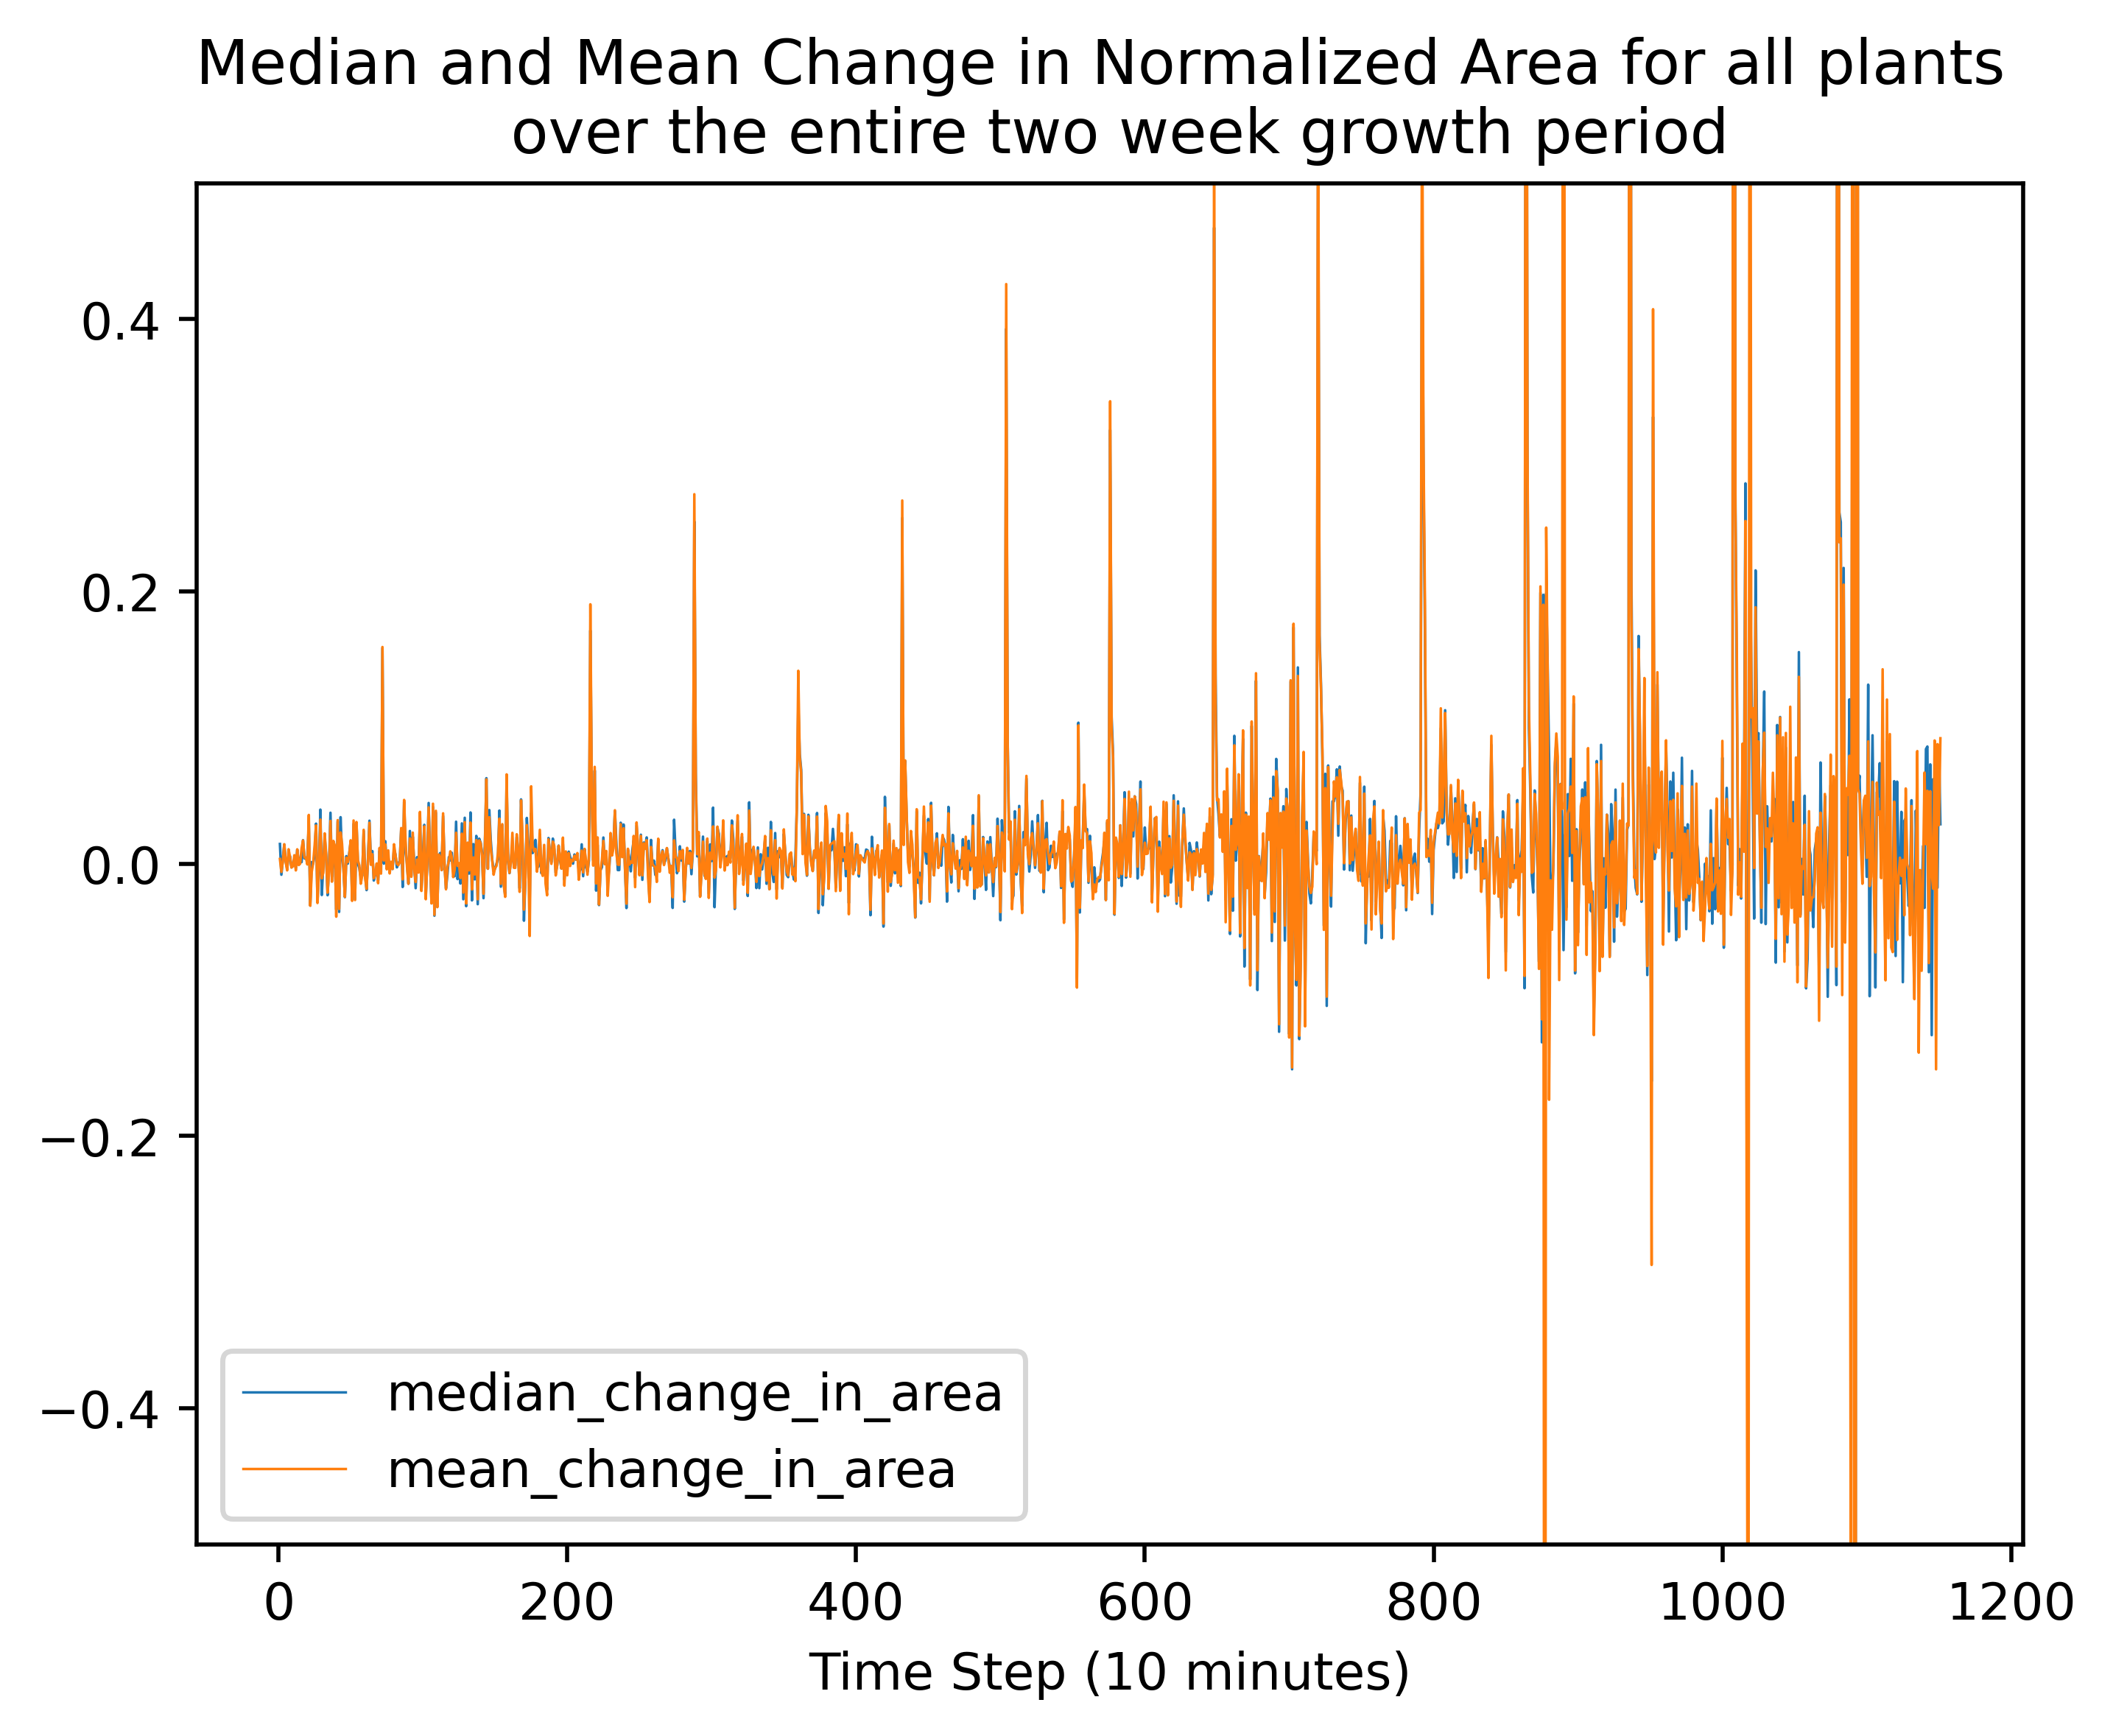

In [193]:
plt.figure(dpi=500)
plt.ylim(-0.5, 0.5)
plt.plot(delta_df['median_change'], label='median_change_in_area', linewidth=0.5)
plt.plot(delta_df['mean_change'], label='mean_change_in_area', linewidth=0.5)
plt.xlabel('Time Step (10 minutes)')
plt.title("Median and Mean Change in Normalized Area for all plants \n over the entire two week growth period")
plt.legend()
plt.show()

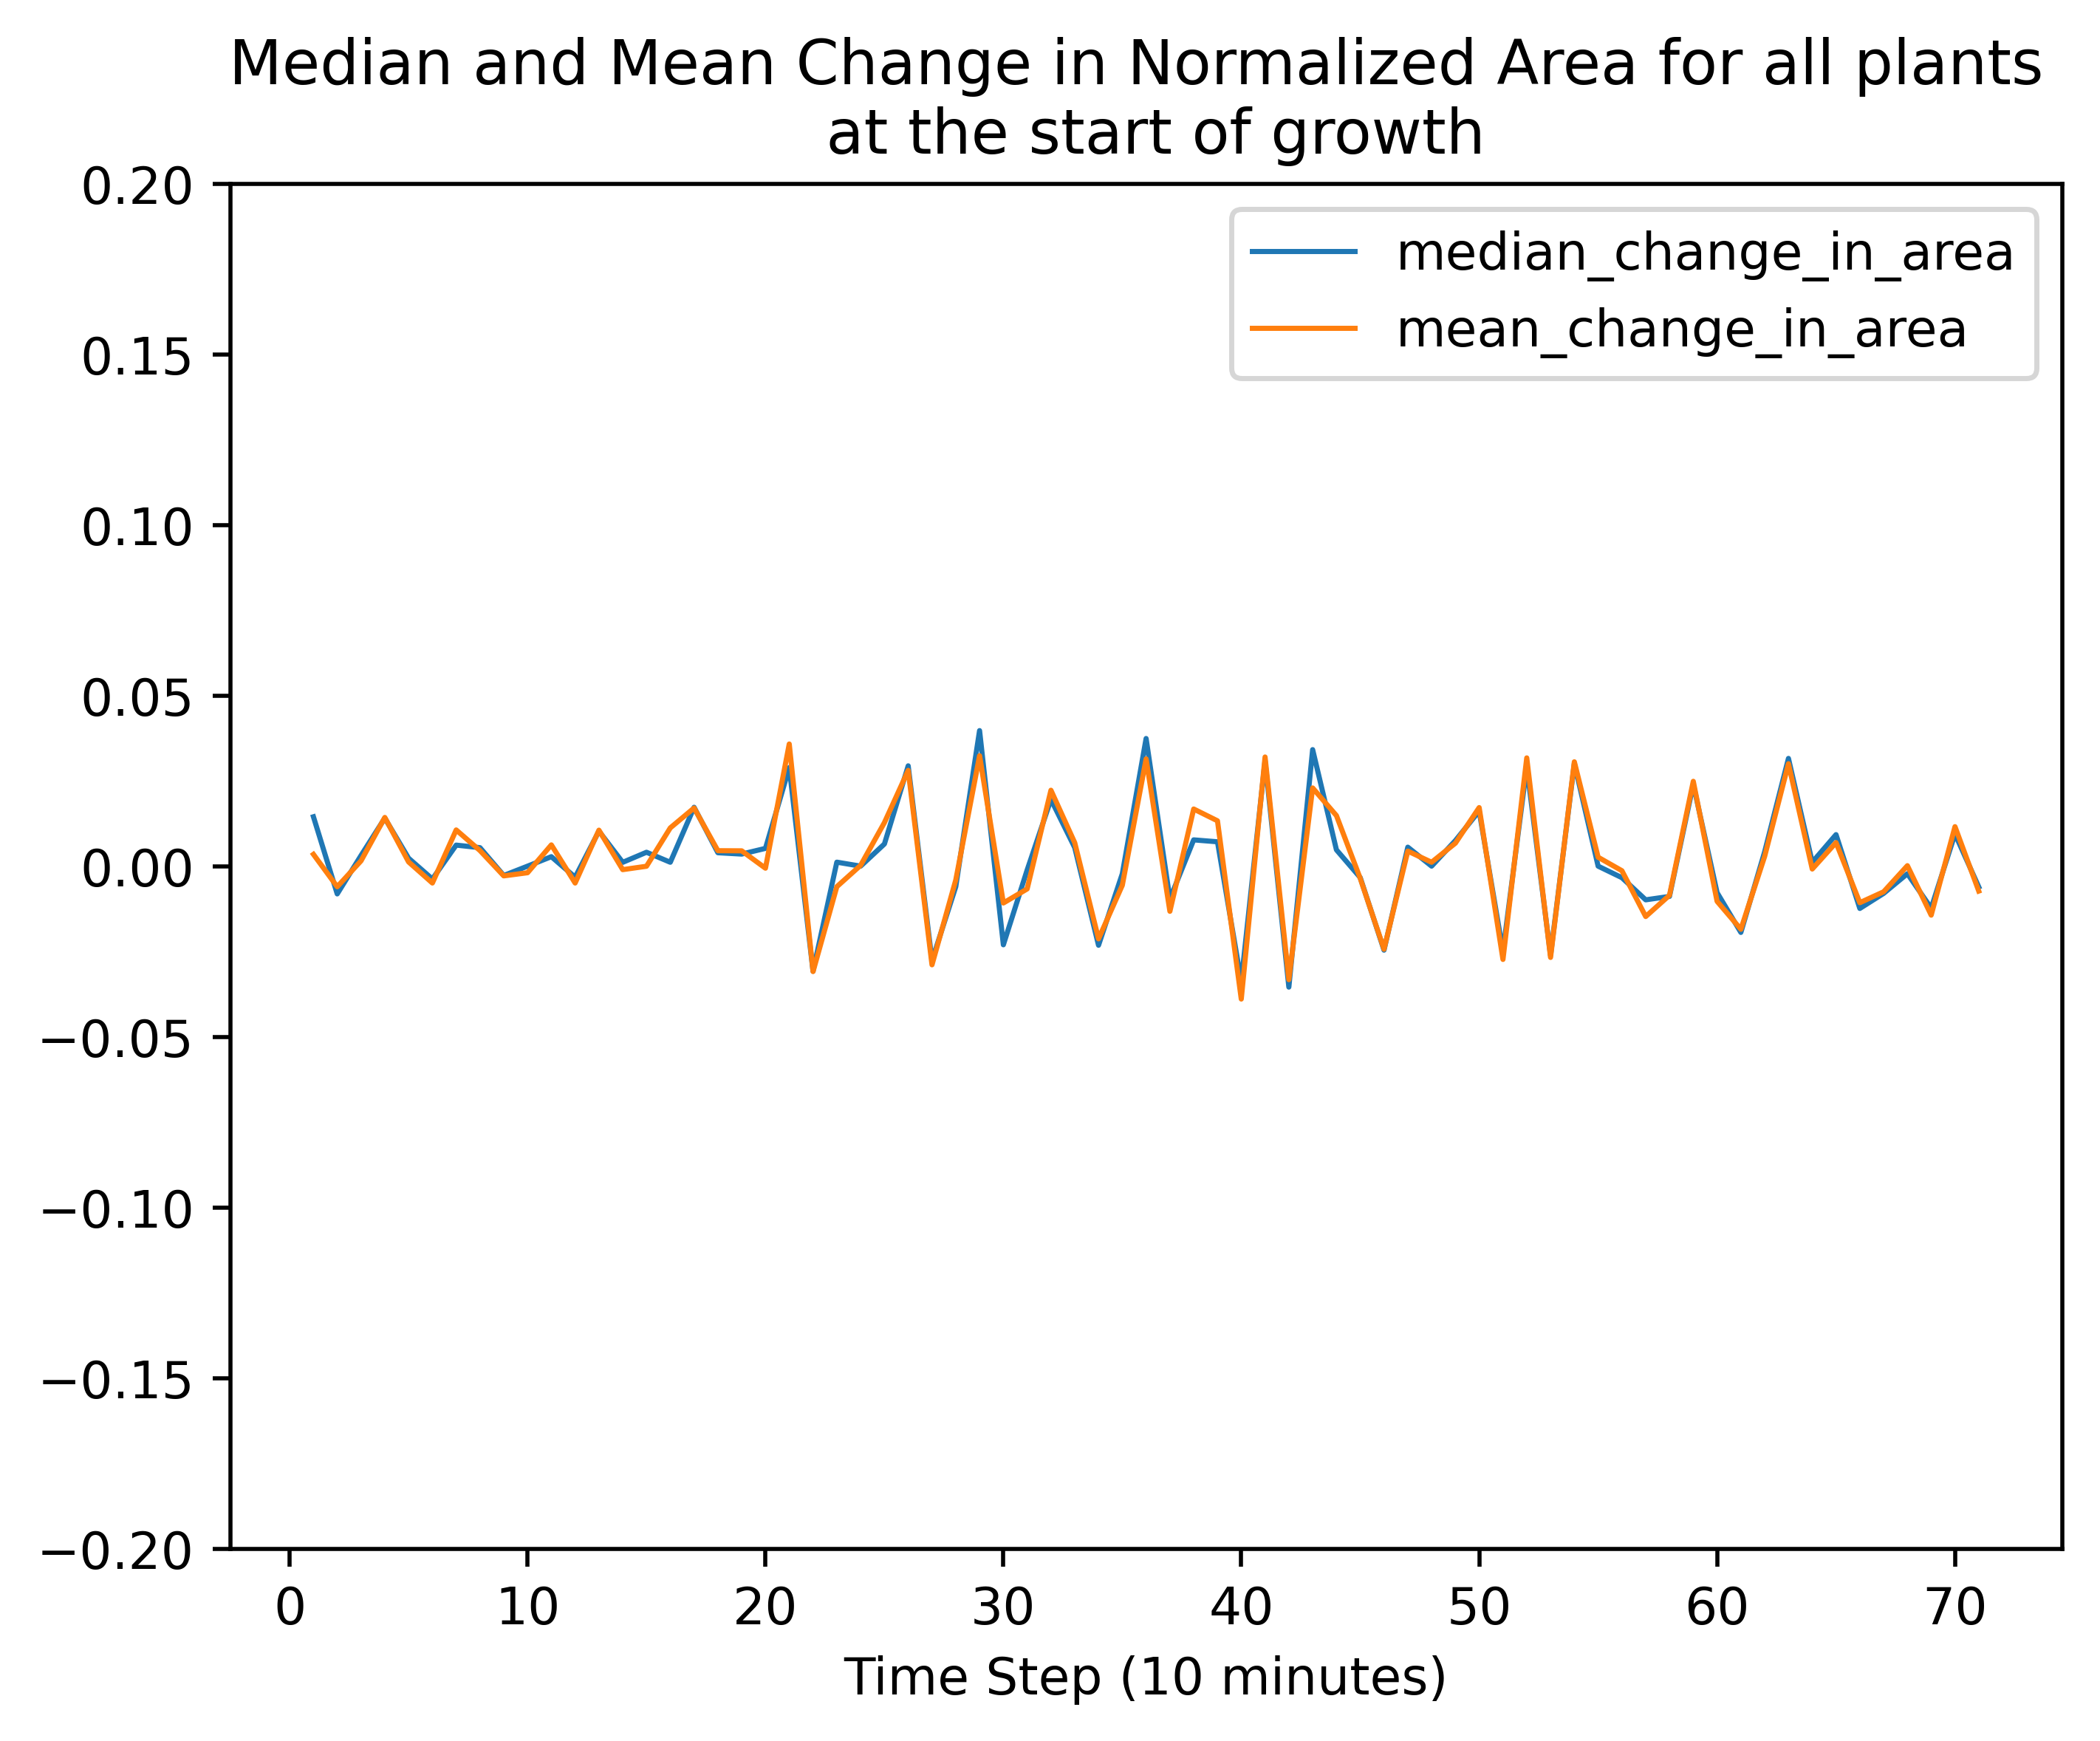

In [194]:
plt.figure(dpi=500)
plt.ylim(-.2, .2)
plt.plot(delta_df['median_change'][:71], label='median_change_in_area', linewidth=1)
plt.plot(delta_df['mean_change'][:71], label='mean_change_in_area', linewidth=1)
plt.xlabel('Time Step (10 minutes)')
plt.title("Median and Mean Change in Normalized Area for all plants \n at the start of growth")
plt.legend()
plt.show()

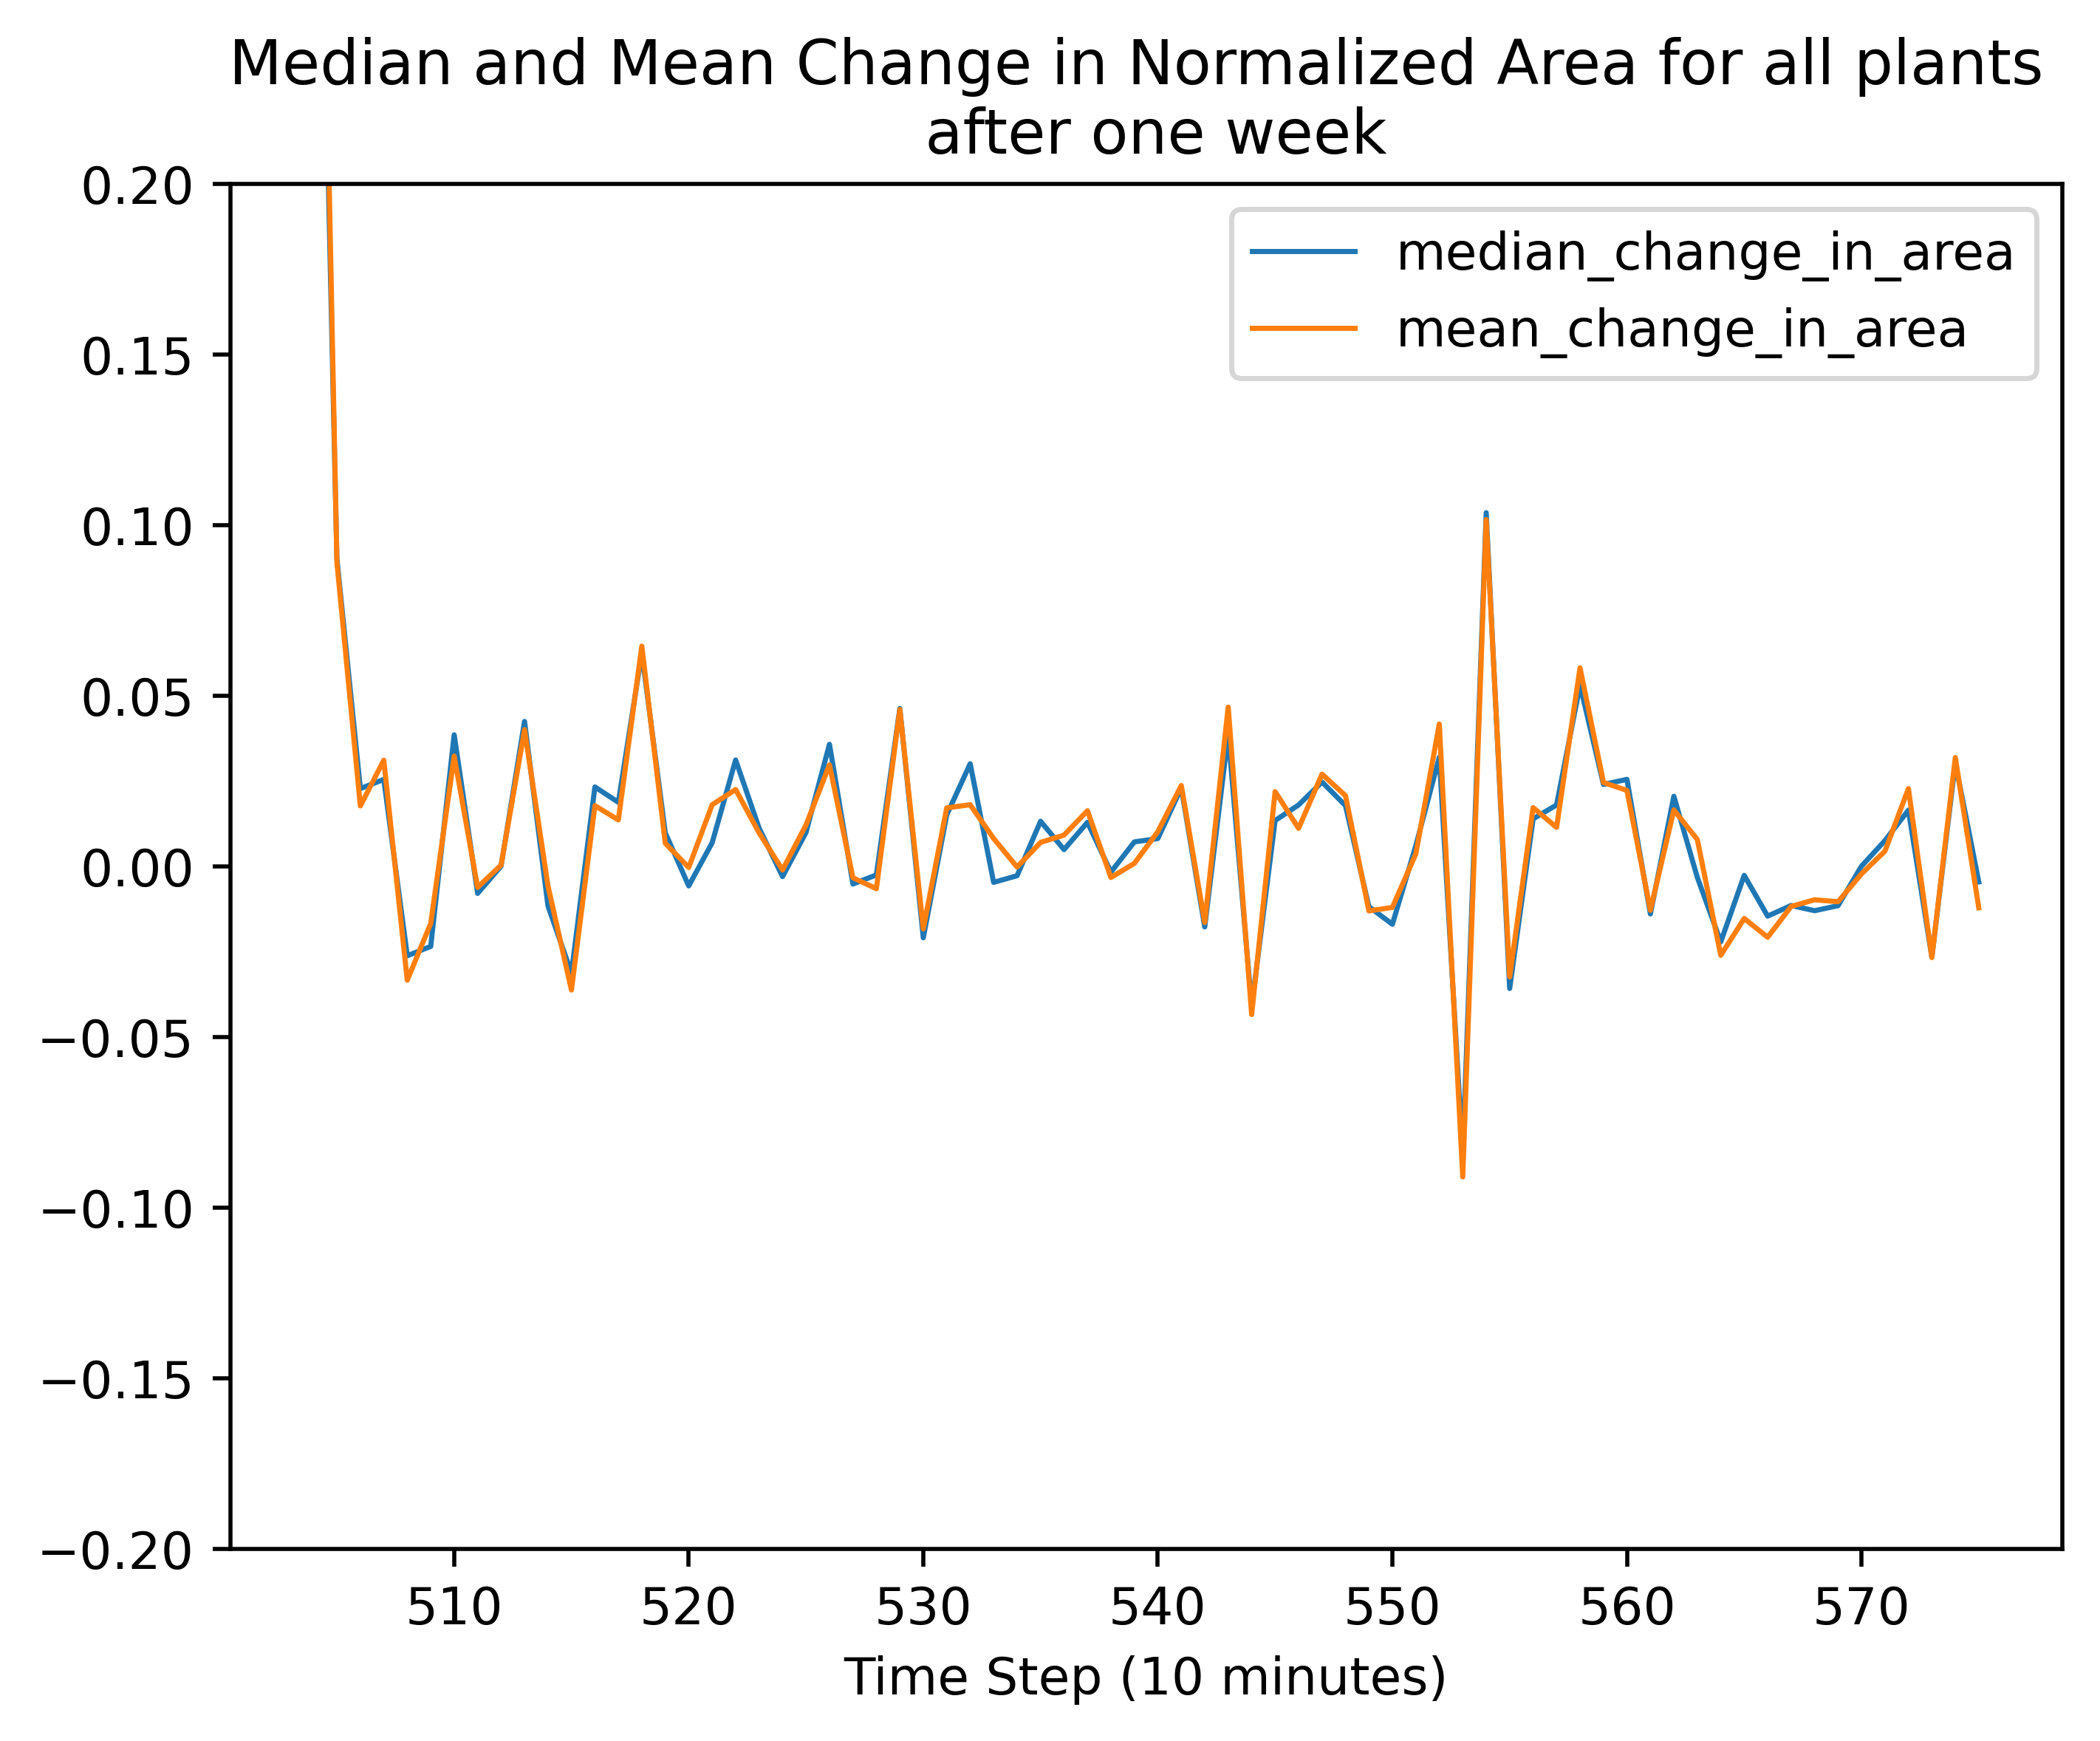

In [195]:
plt.figure(dpi=500)
plt.ylim(-.2, .2)
plt.plot(delta_df['median_change'][503:575], label='median_change_in_area', linewidth=1)
plt.plot(delta_df['mean_change'][503:575], label='mean_change_in_area', linewidth=1)
plt.xlabel('Time Step (10 minutes)')
plt.title("Median and Mean Change in Normalized Area for all plants \n after one week")
plt.legend()
plt.show()

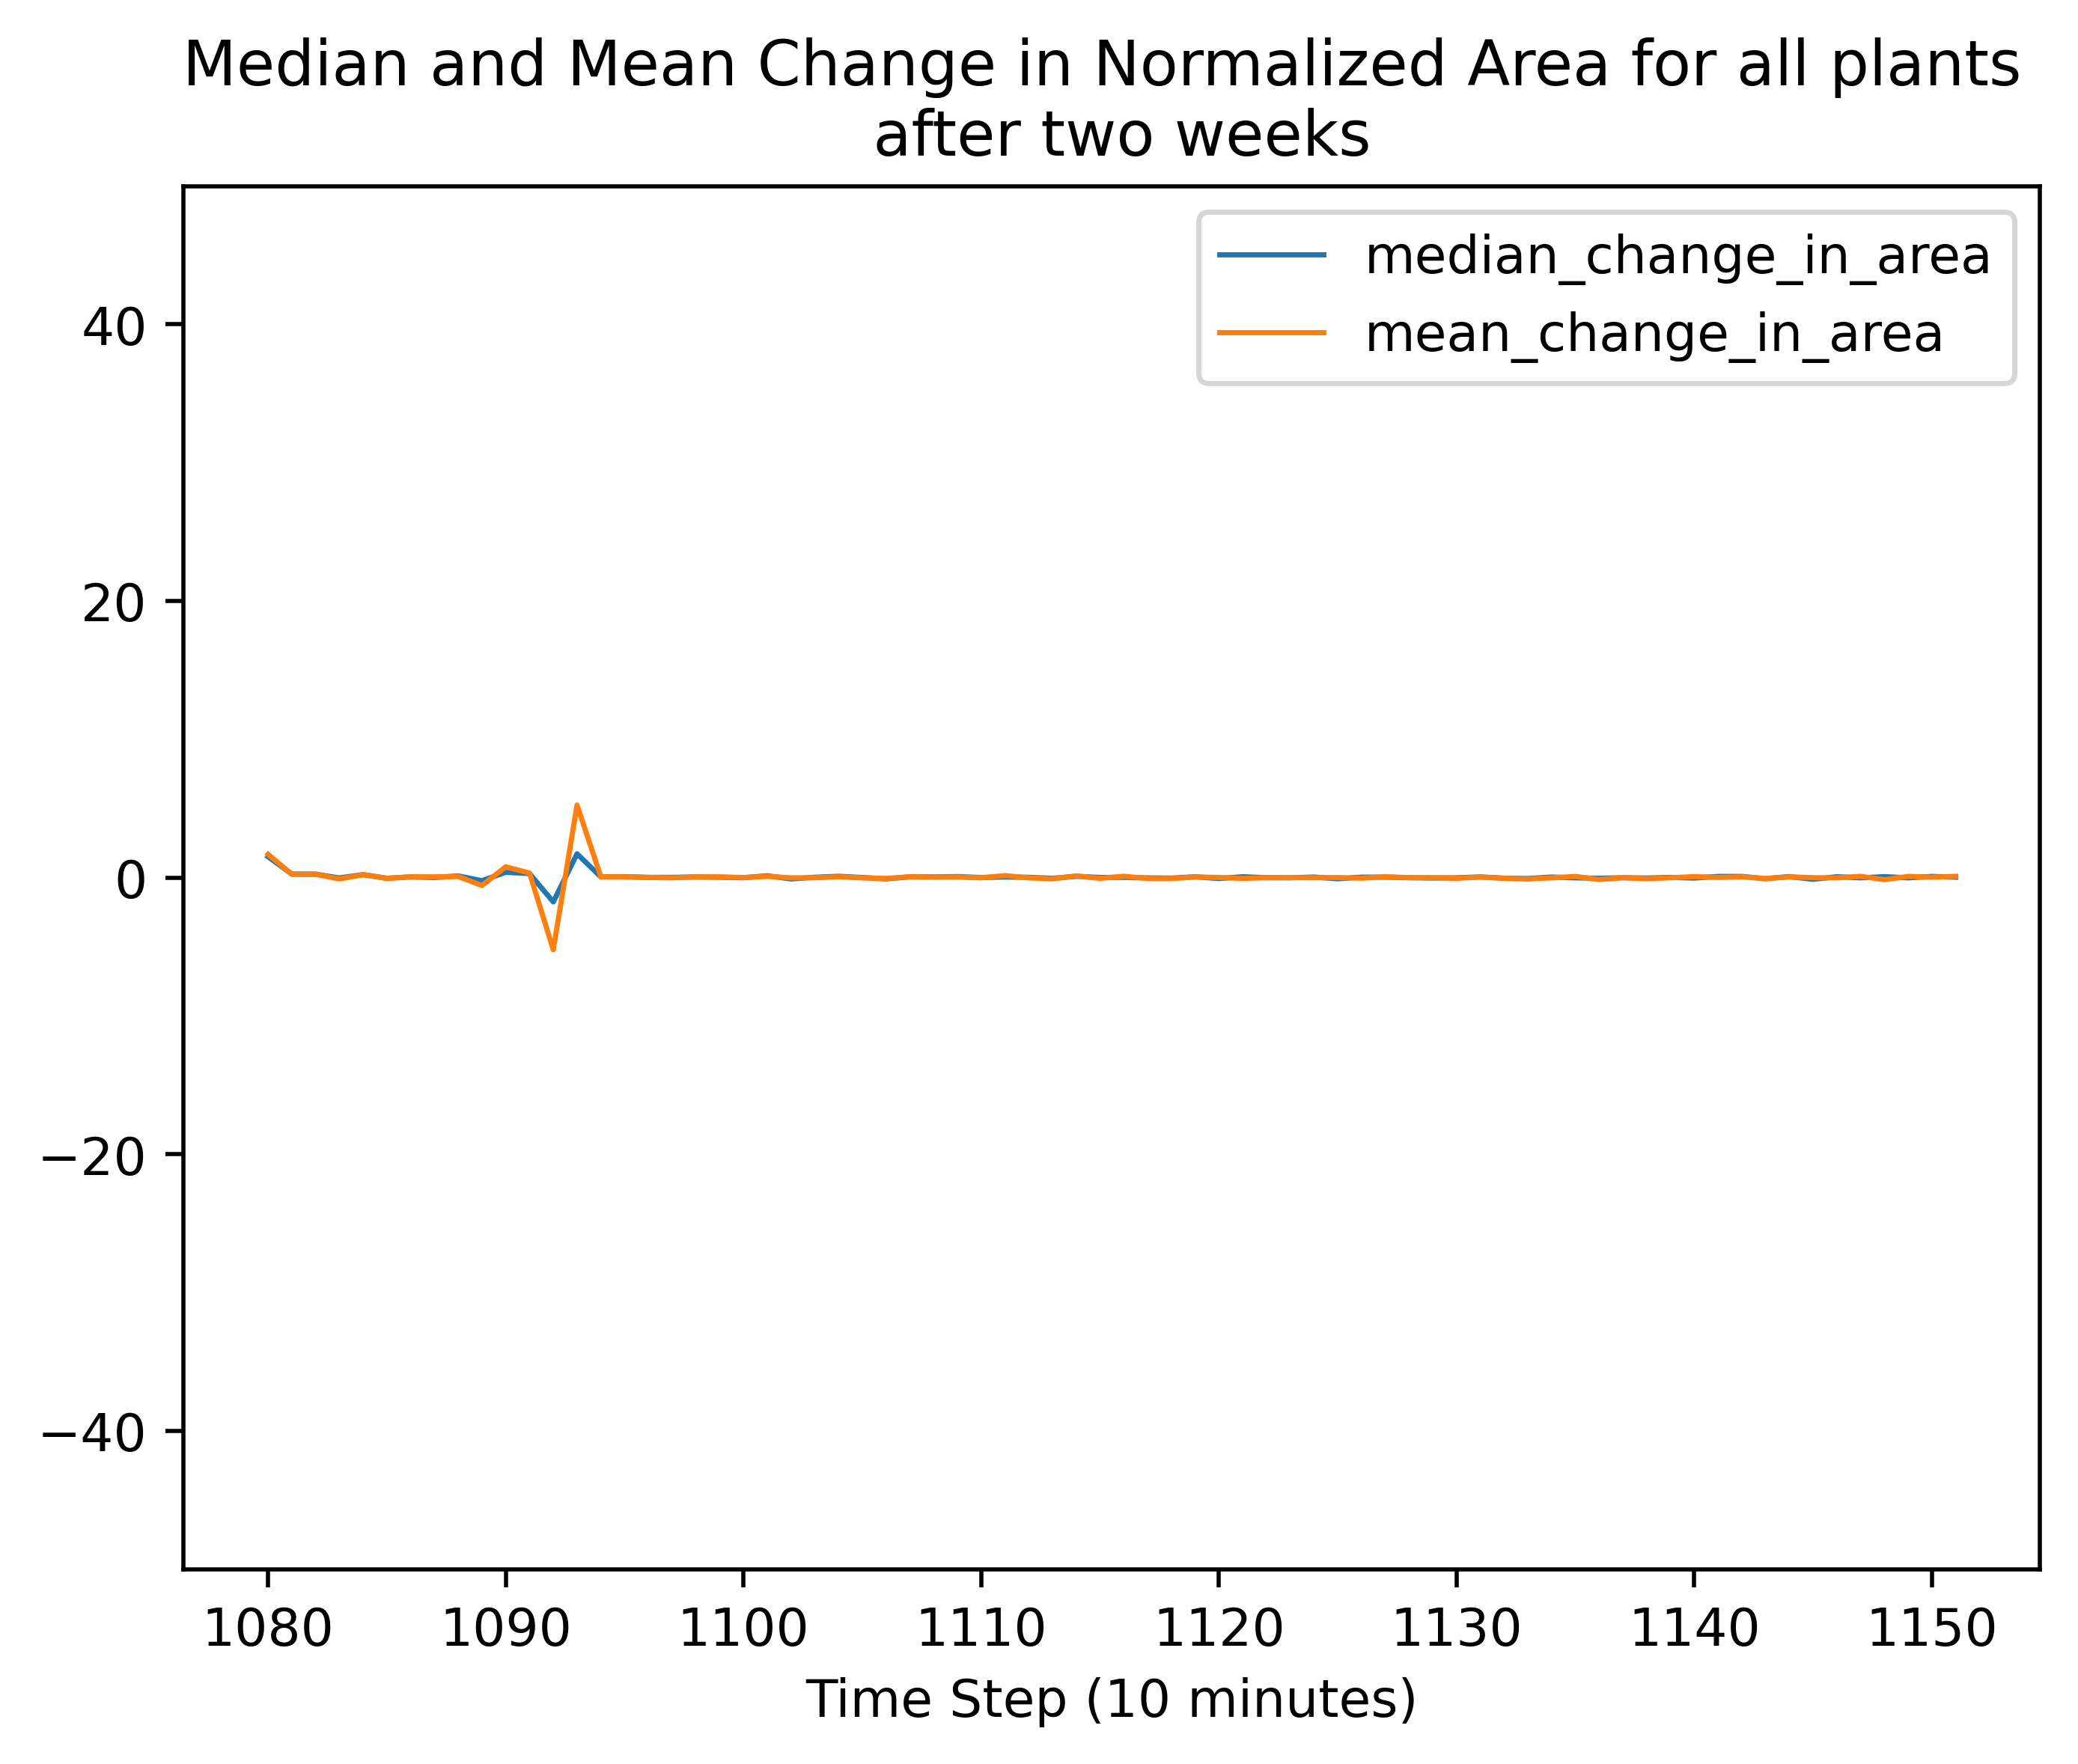

In [196]:
plt.figure(dpi=500)
plt.ylim(-50, 50)
plt.plot(delta_df['median_change'][1079:], label='median_change_in_area', linewidth=1)
plt.plot(delta_df['mean_change'][1079:], label='mean_change_in_area', linewidth=1)
plt.xlabel('Time Step (10 minutes)')
plt.title("Median and Mean Change in Normalized Area for all plants \n after two weeks")
plt.legend()
plt.show()

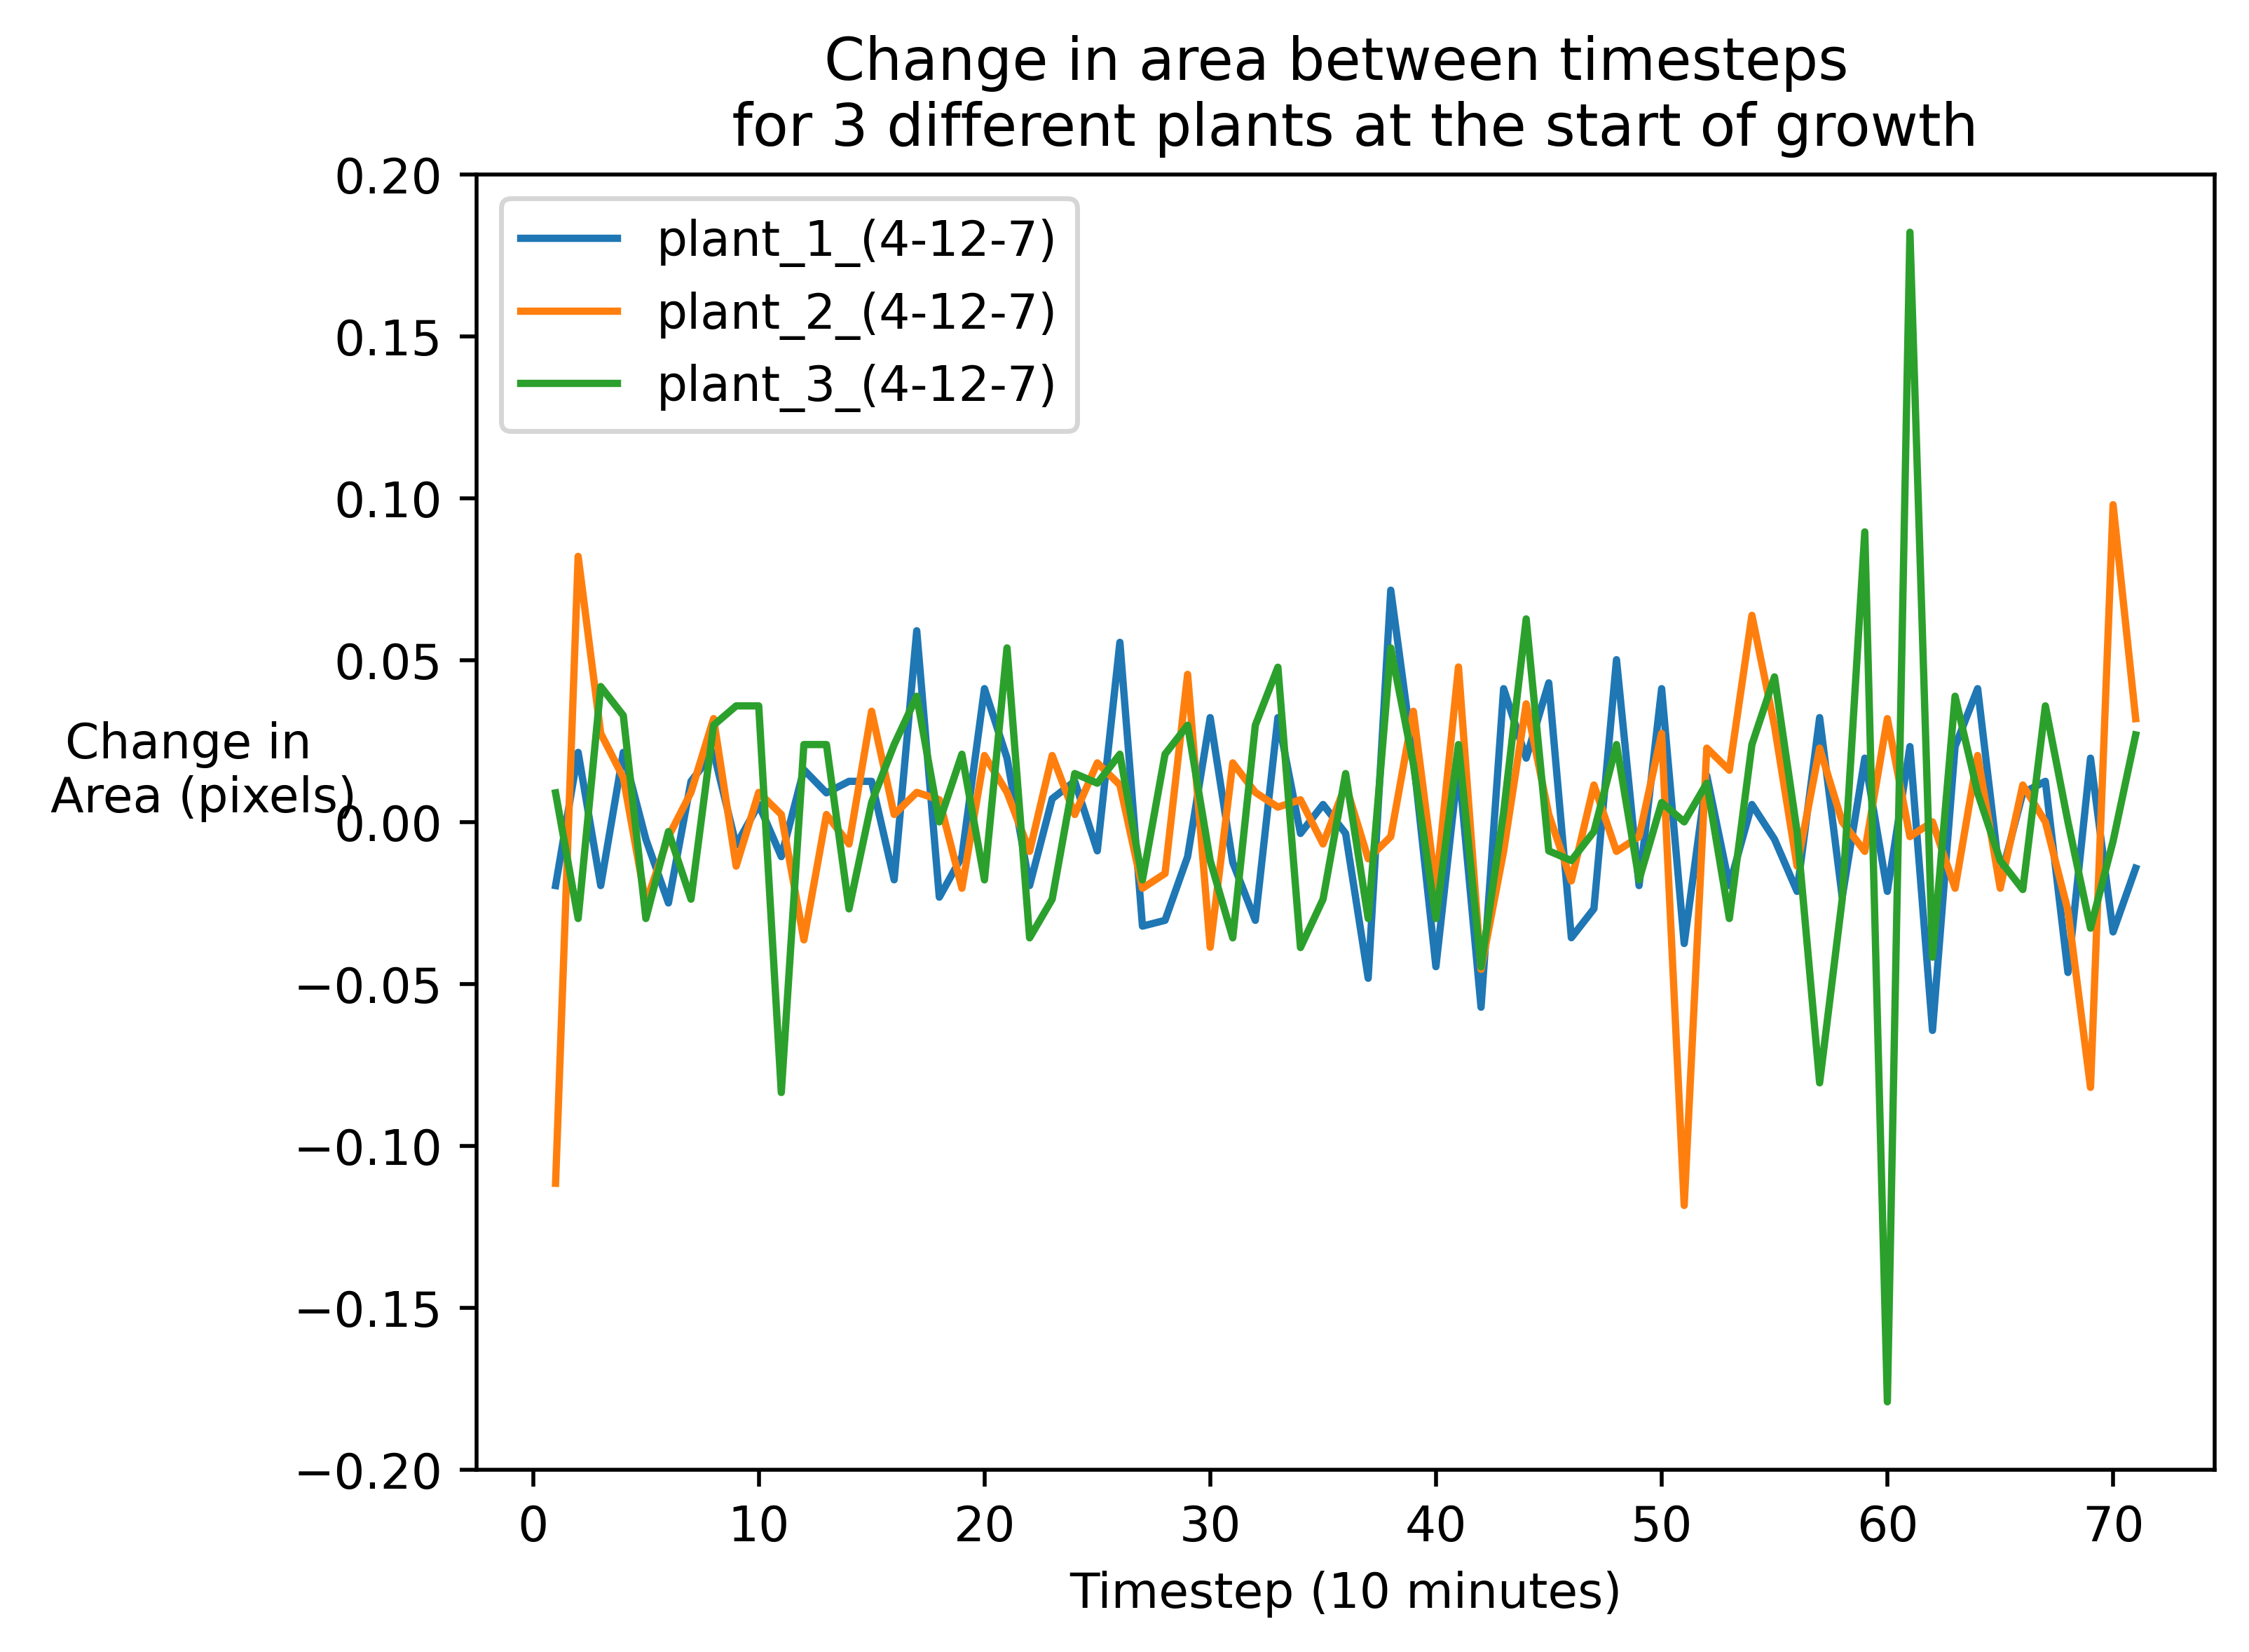

In [197]:
plt.figure(dpi=500)
example_plants = delta_df.iloc[:71, 1:4]
for plant in example_plants.columns:
    label = ' '.join(plant.split()[:2])
    plt.plot(example_plants.index, example_plants[plant], label=label)

plt.ylim(-.2, .2)
plt.xlabel('Timestep (10 minutes)')
plt.ylabel('Change in \n normalized area (pixels)', rotation=0, labelpad=20)
plt.title("Change in normalized area between timesteps \n for 3 different plants at the start of growth")
plt.legend()
plt.show()

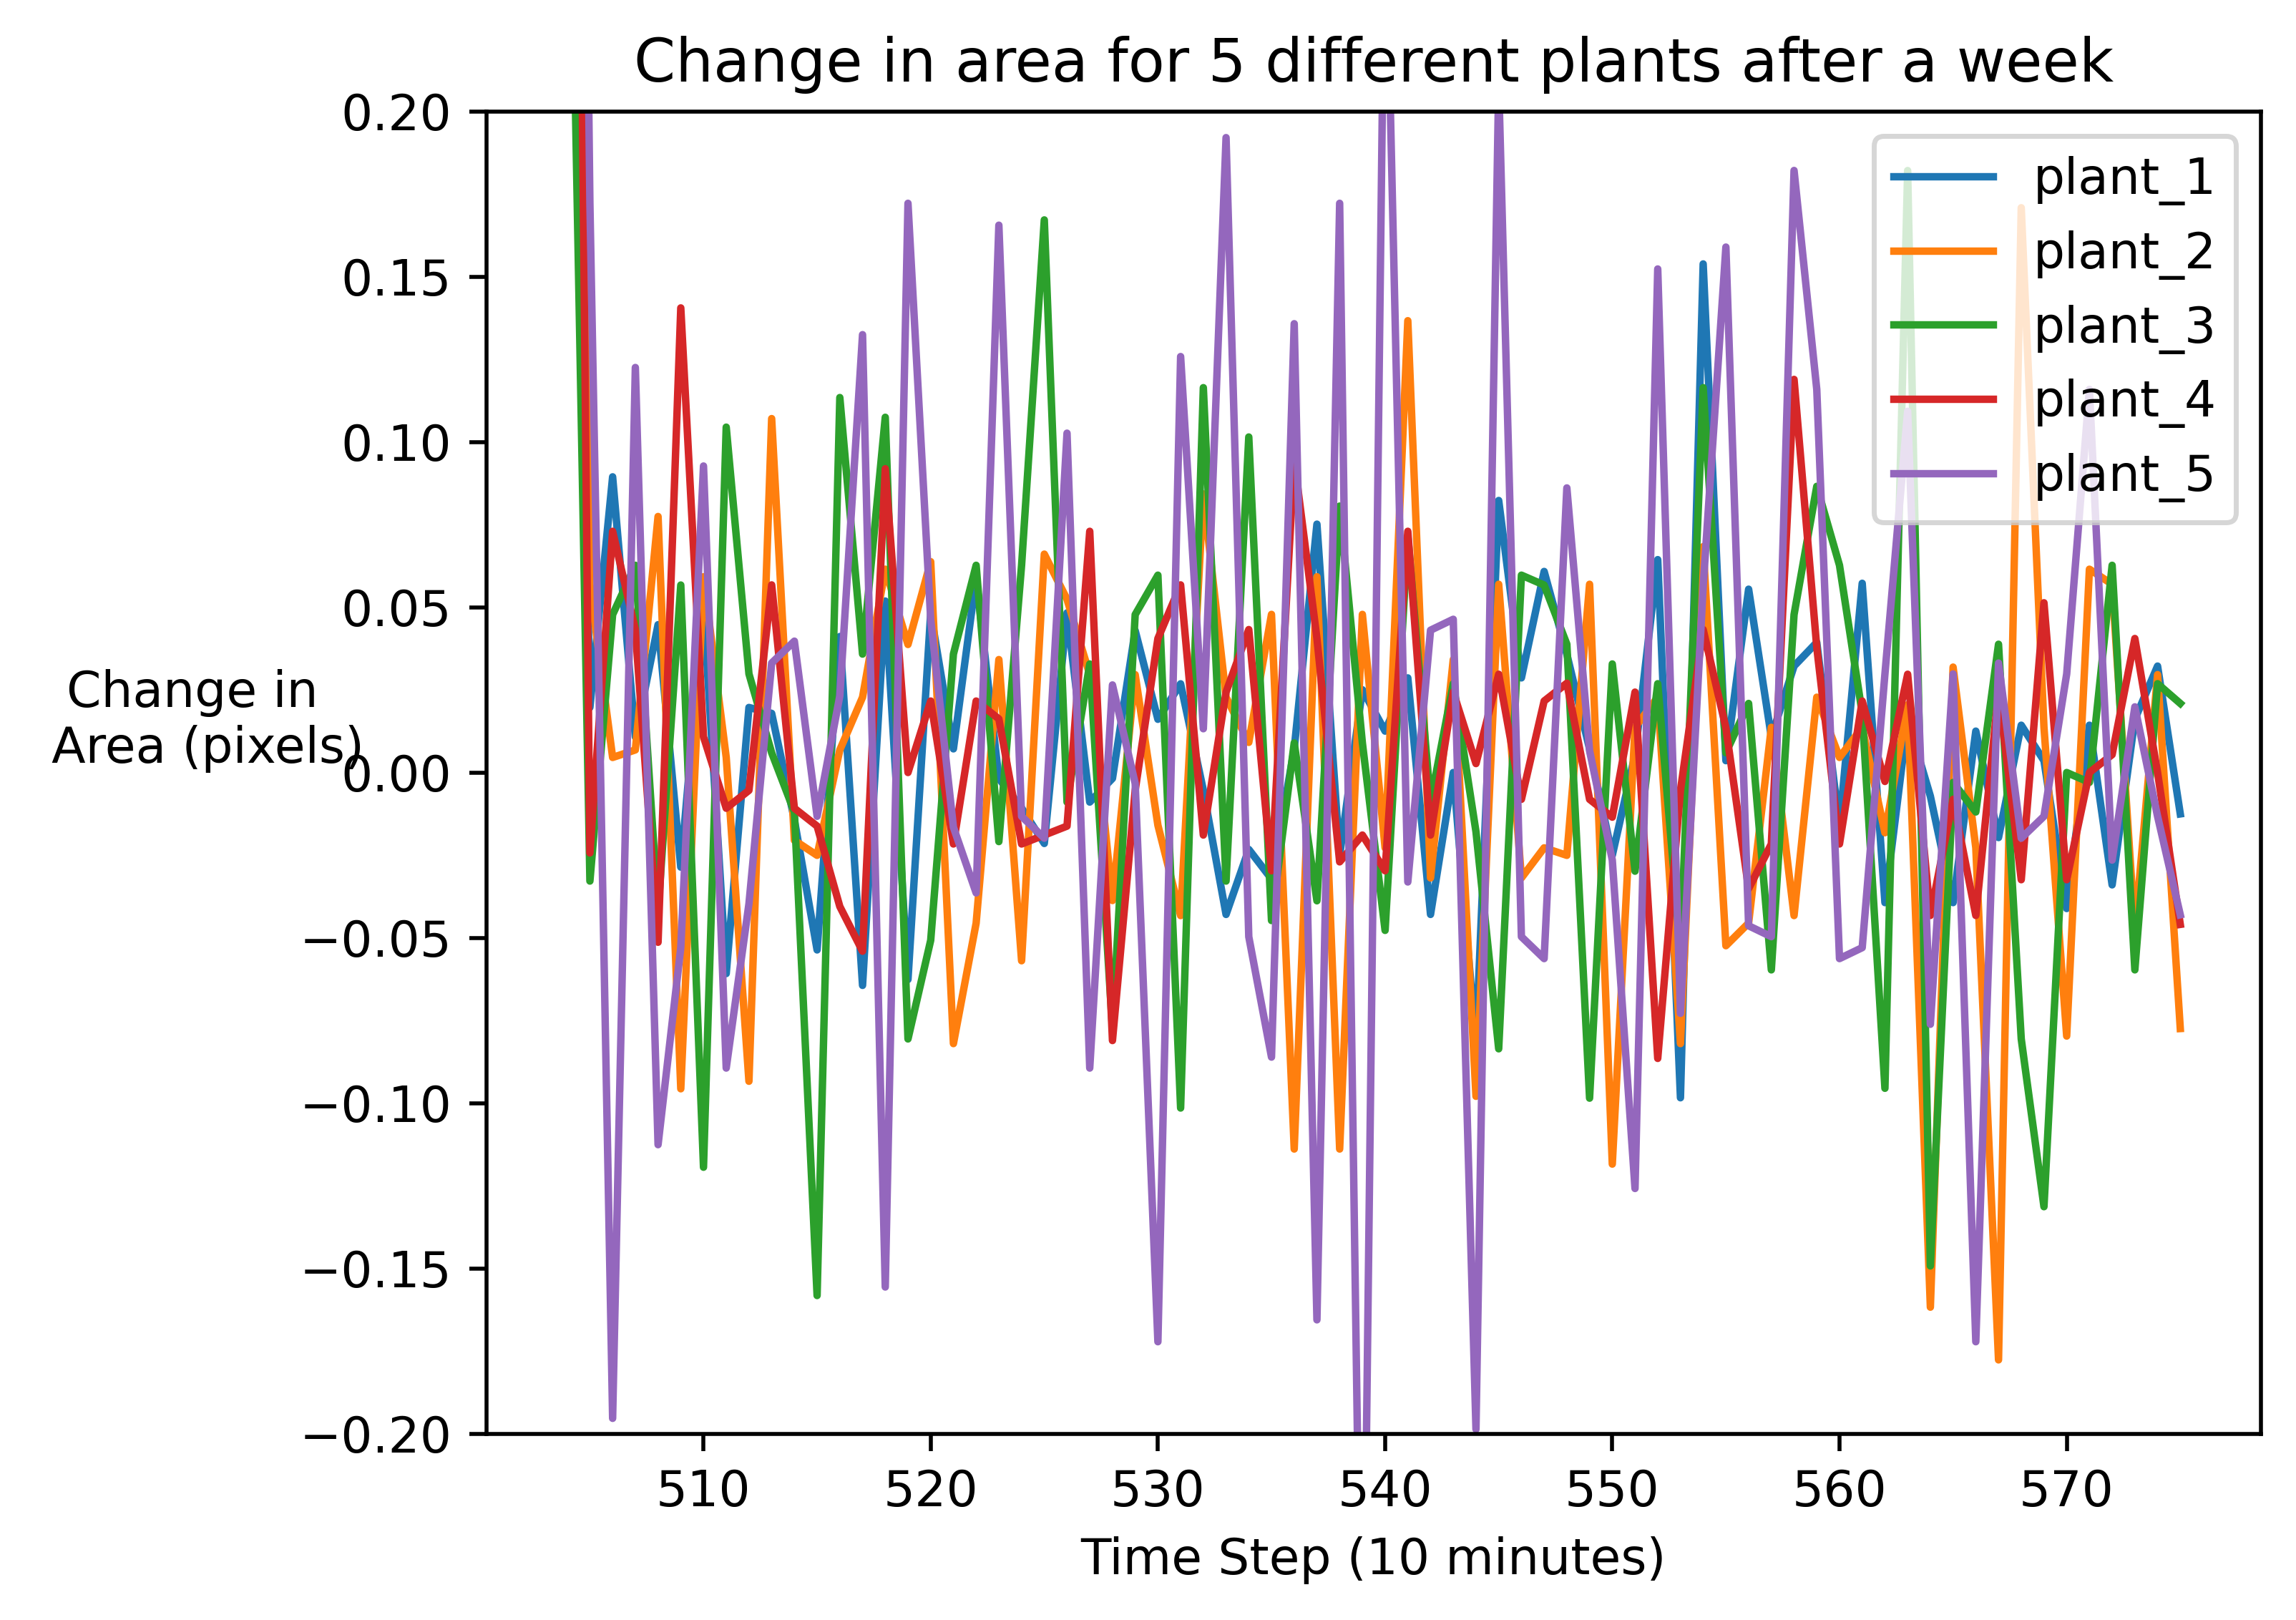

In [ ]:
plt.figure(dpi=500)
example_plants = delta_df.iloc[503:575, 1:6]
for plant in example_plants.columns:
    label = '_'.join(plant.split('_')[:2])
    plt.plot(example_plants.index, example_plants[plant], label=label)

plt.ylim(-.2, .2)
plt.xlabel('Time Step (10 minutes)')
plt.ylabel('Change in \n normalized area (pixels)', rotation=0, labelpad=20)
plt.title("Change in normalized area for 5 different plants after a week")
plt.legend()
plt.show()

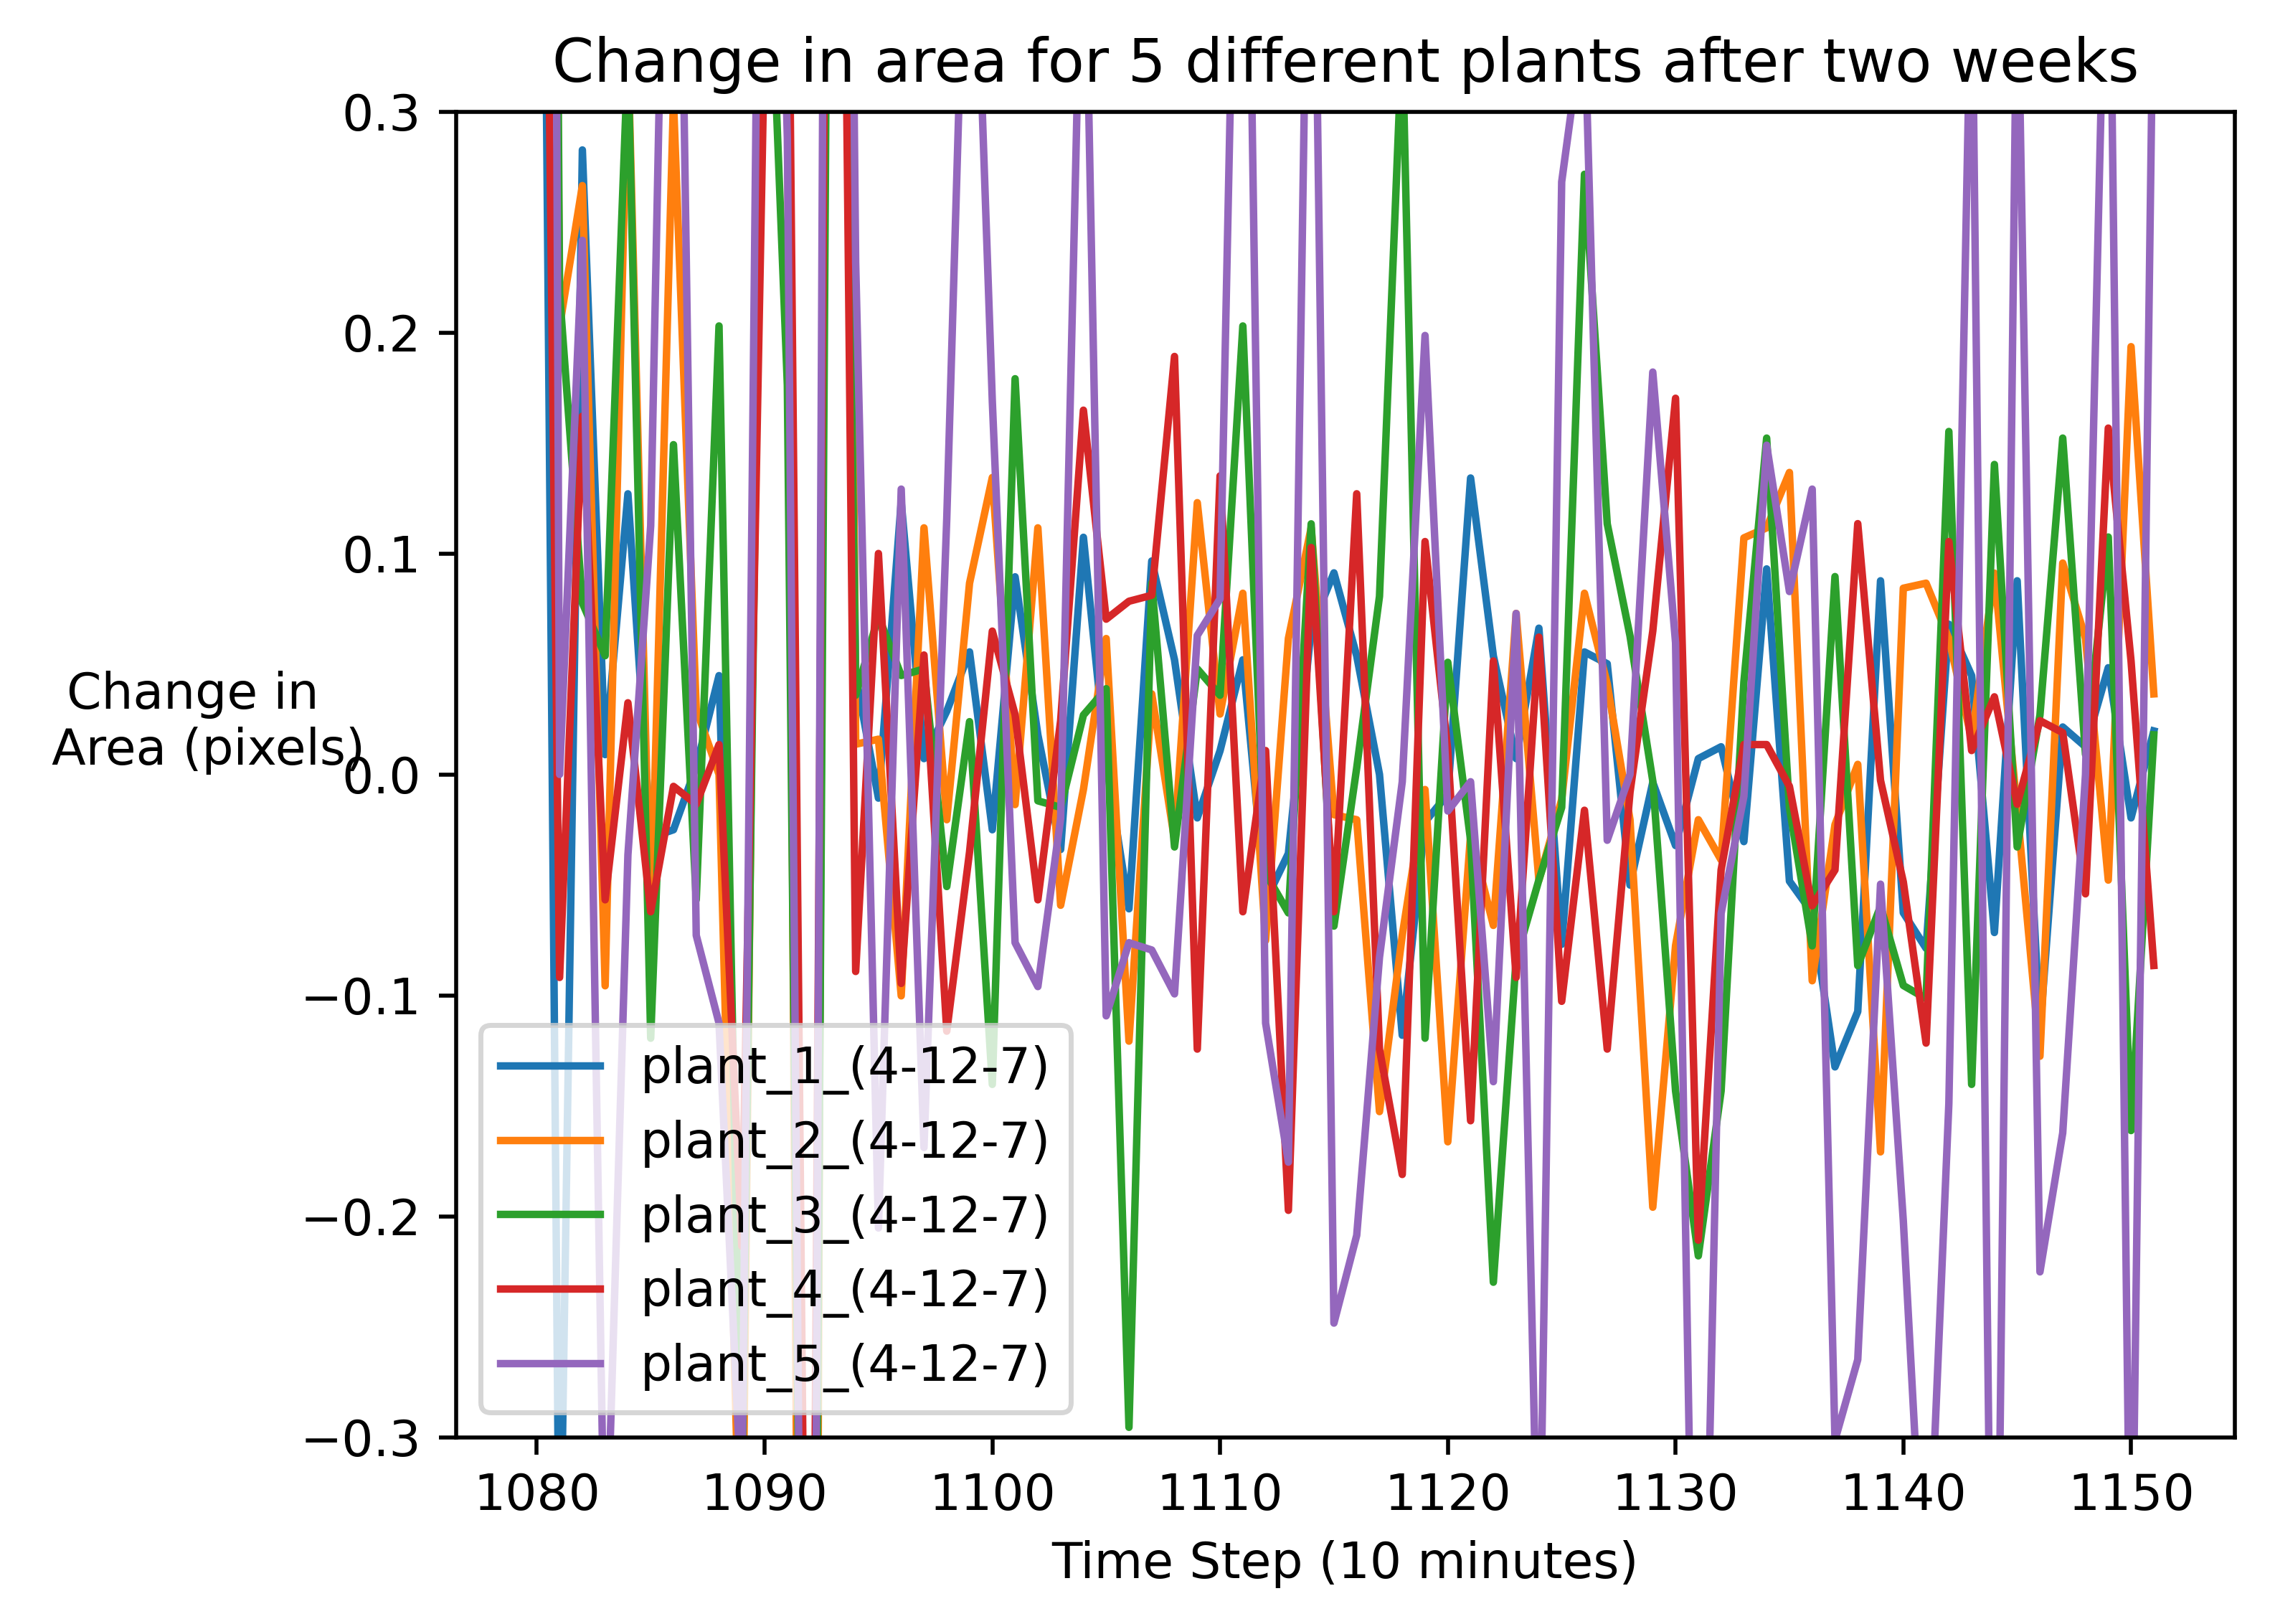

In [200]:
plt.figure(dpi=500)
example_plants = delta_df.iloc[1079:, 1:6]
for plant in example_plants.columns:
    label = ' '.join(plant.split()[:2])
    plt.plot(example_plants.index, example_plants[plant], label=label)

plt.ylim(-.3, .3)
plt.xlabel('Time Step (10 minutes)')
plt.ylabel('Change in \n normalized area (pixels)', rotation=0, labelpad=20)
plt.title("Change in normalized area for 5 different plants after two weeks")
plt.legend()
plt.show()

#### Plots for Standup 1/24/24

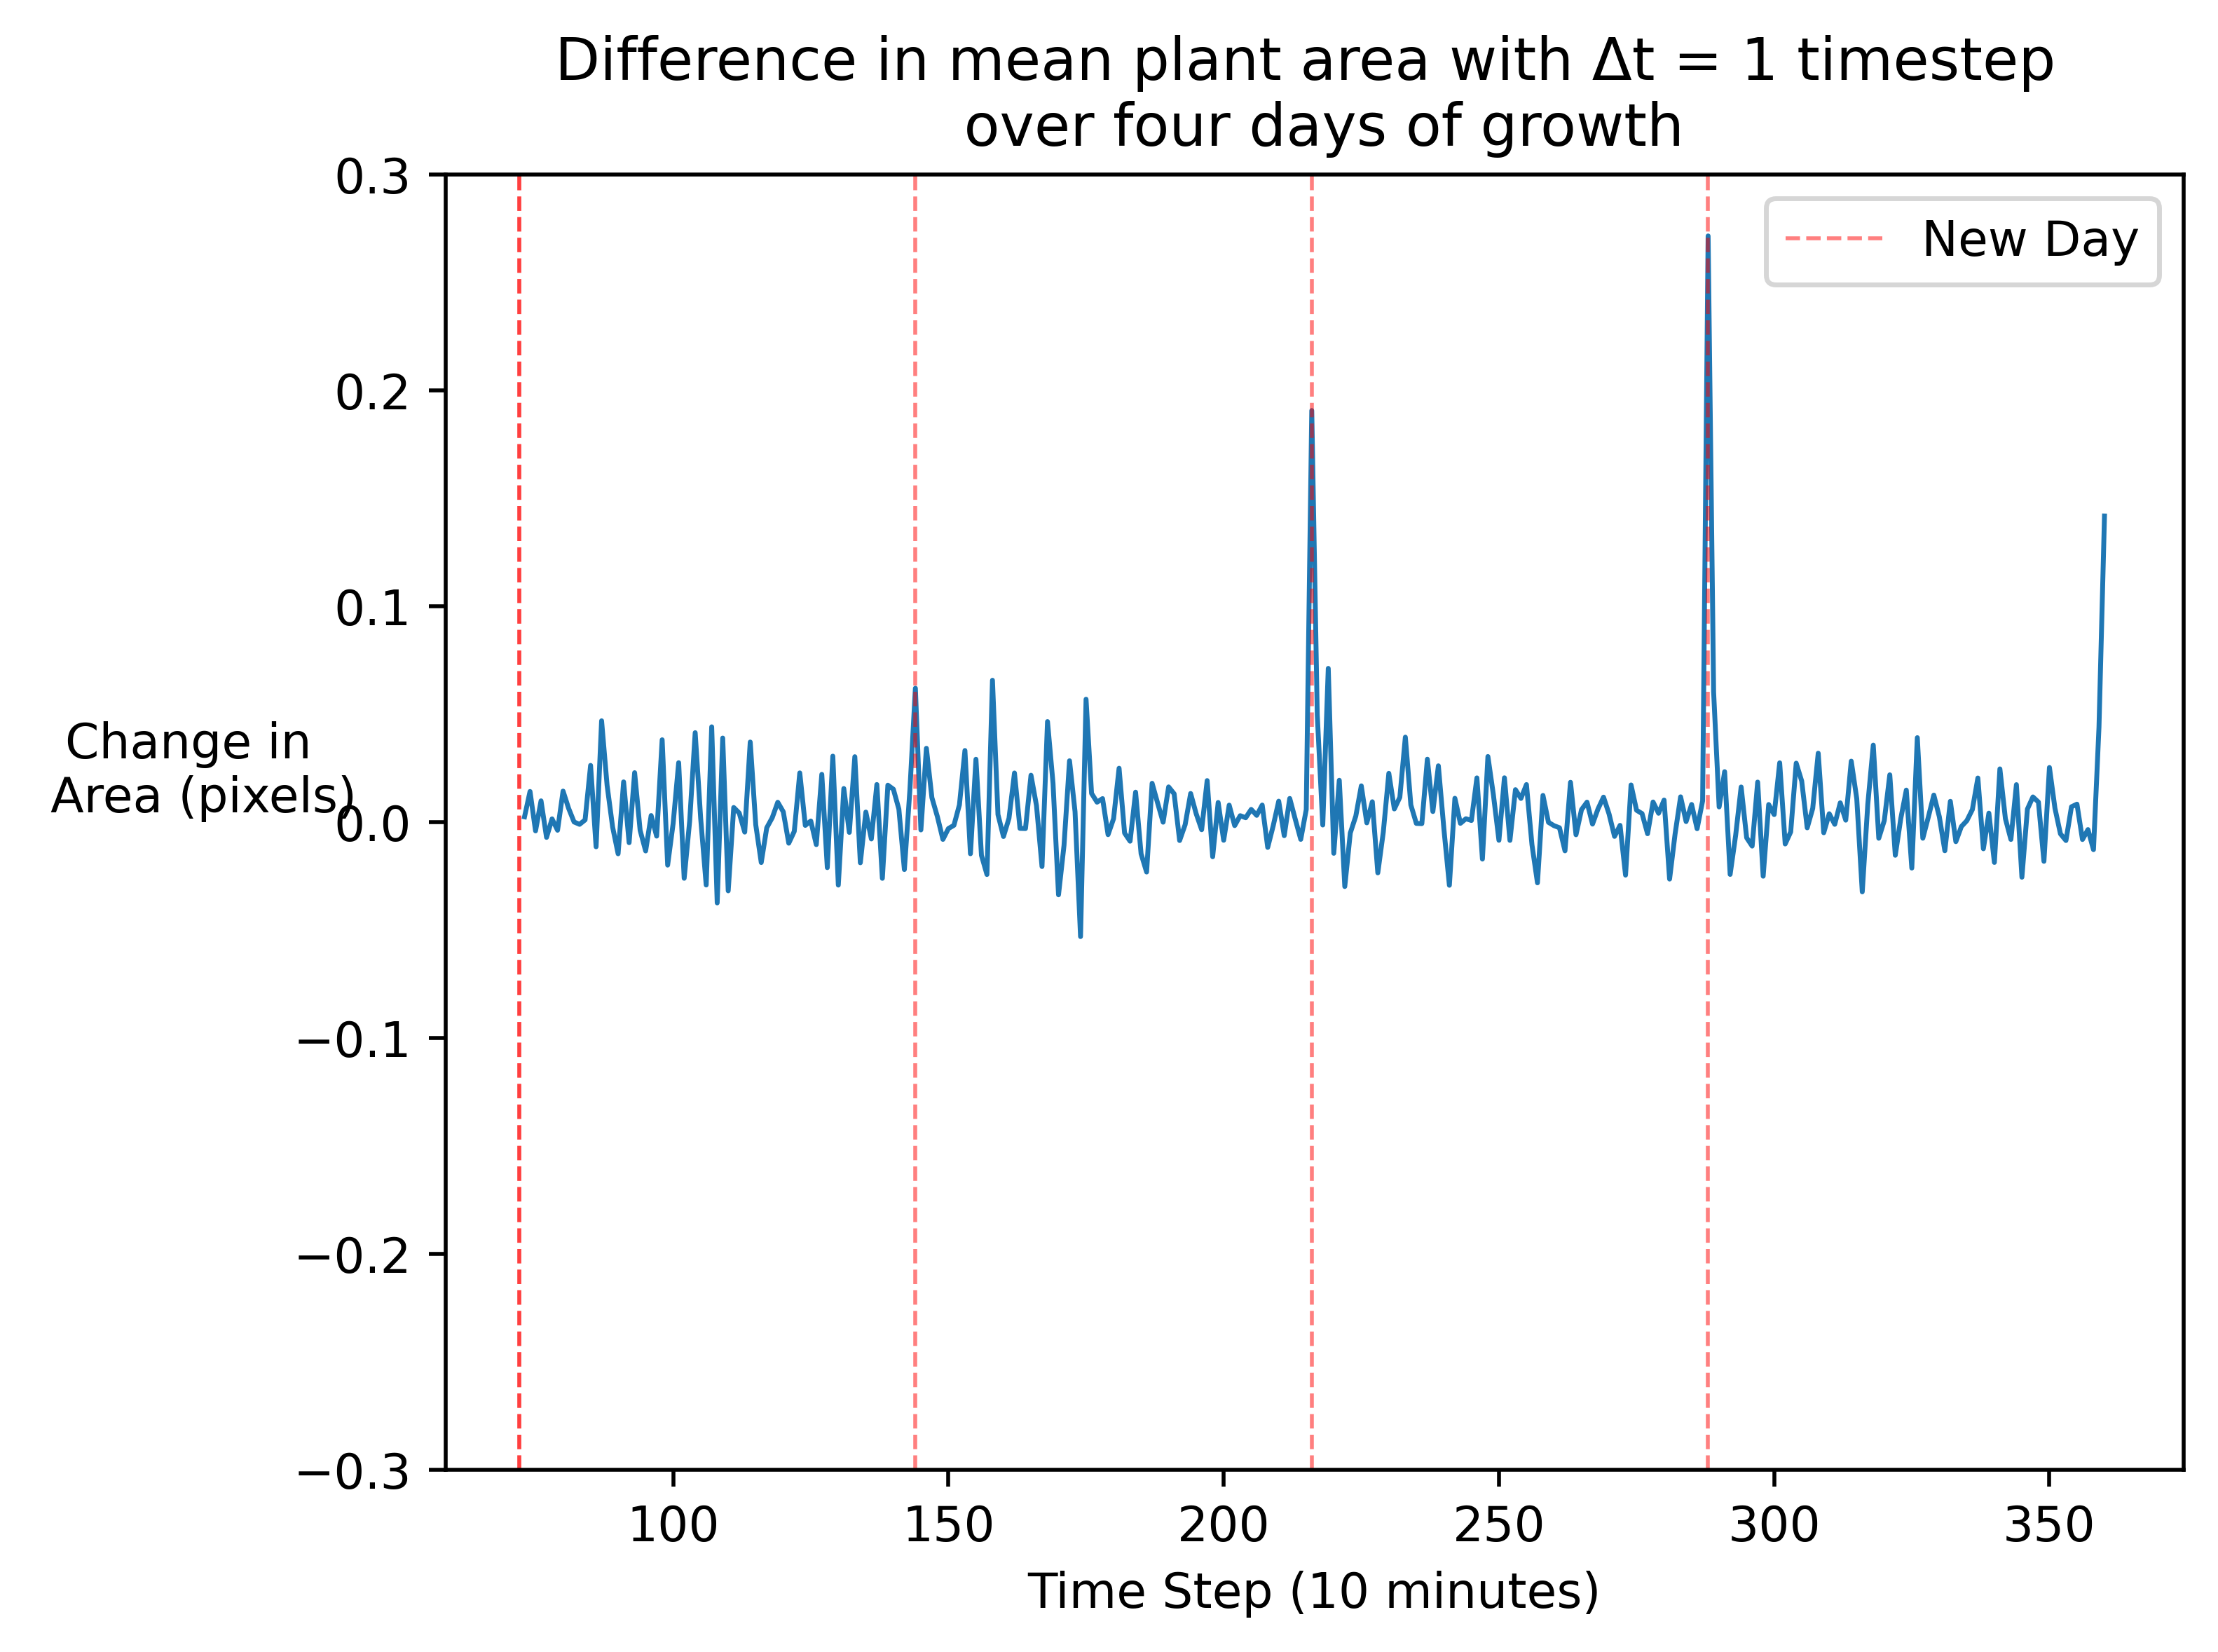

In [ ]:
plt.figure(dpi=500)
plt.ylim(-.3, .3)
plt.plot(delta_df['mean_change'][72:360], linewidth=1)
for i in range(72, 360, 72):
    plt.axvline(x=i, color='red', linestyle='--', alpha=0.5, linewidth=0.8)
plt.axvline(x=72, color='red', linestyle='--', alpha=0.5, linewidth=0.8, label='New Day')
plt.xlabel('Time Step (10 minutes)')
plt.ylabel('Change in \n normalized area (pixels)', rotation=0, labelpad=20)
plt.title("Difference in mean plant normalized area with Δt = 1 timestep \n over four days of growth")
plt.legend()
plt.show()

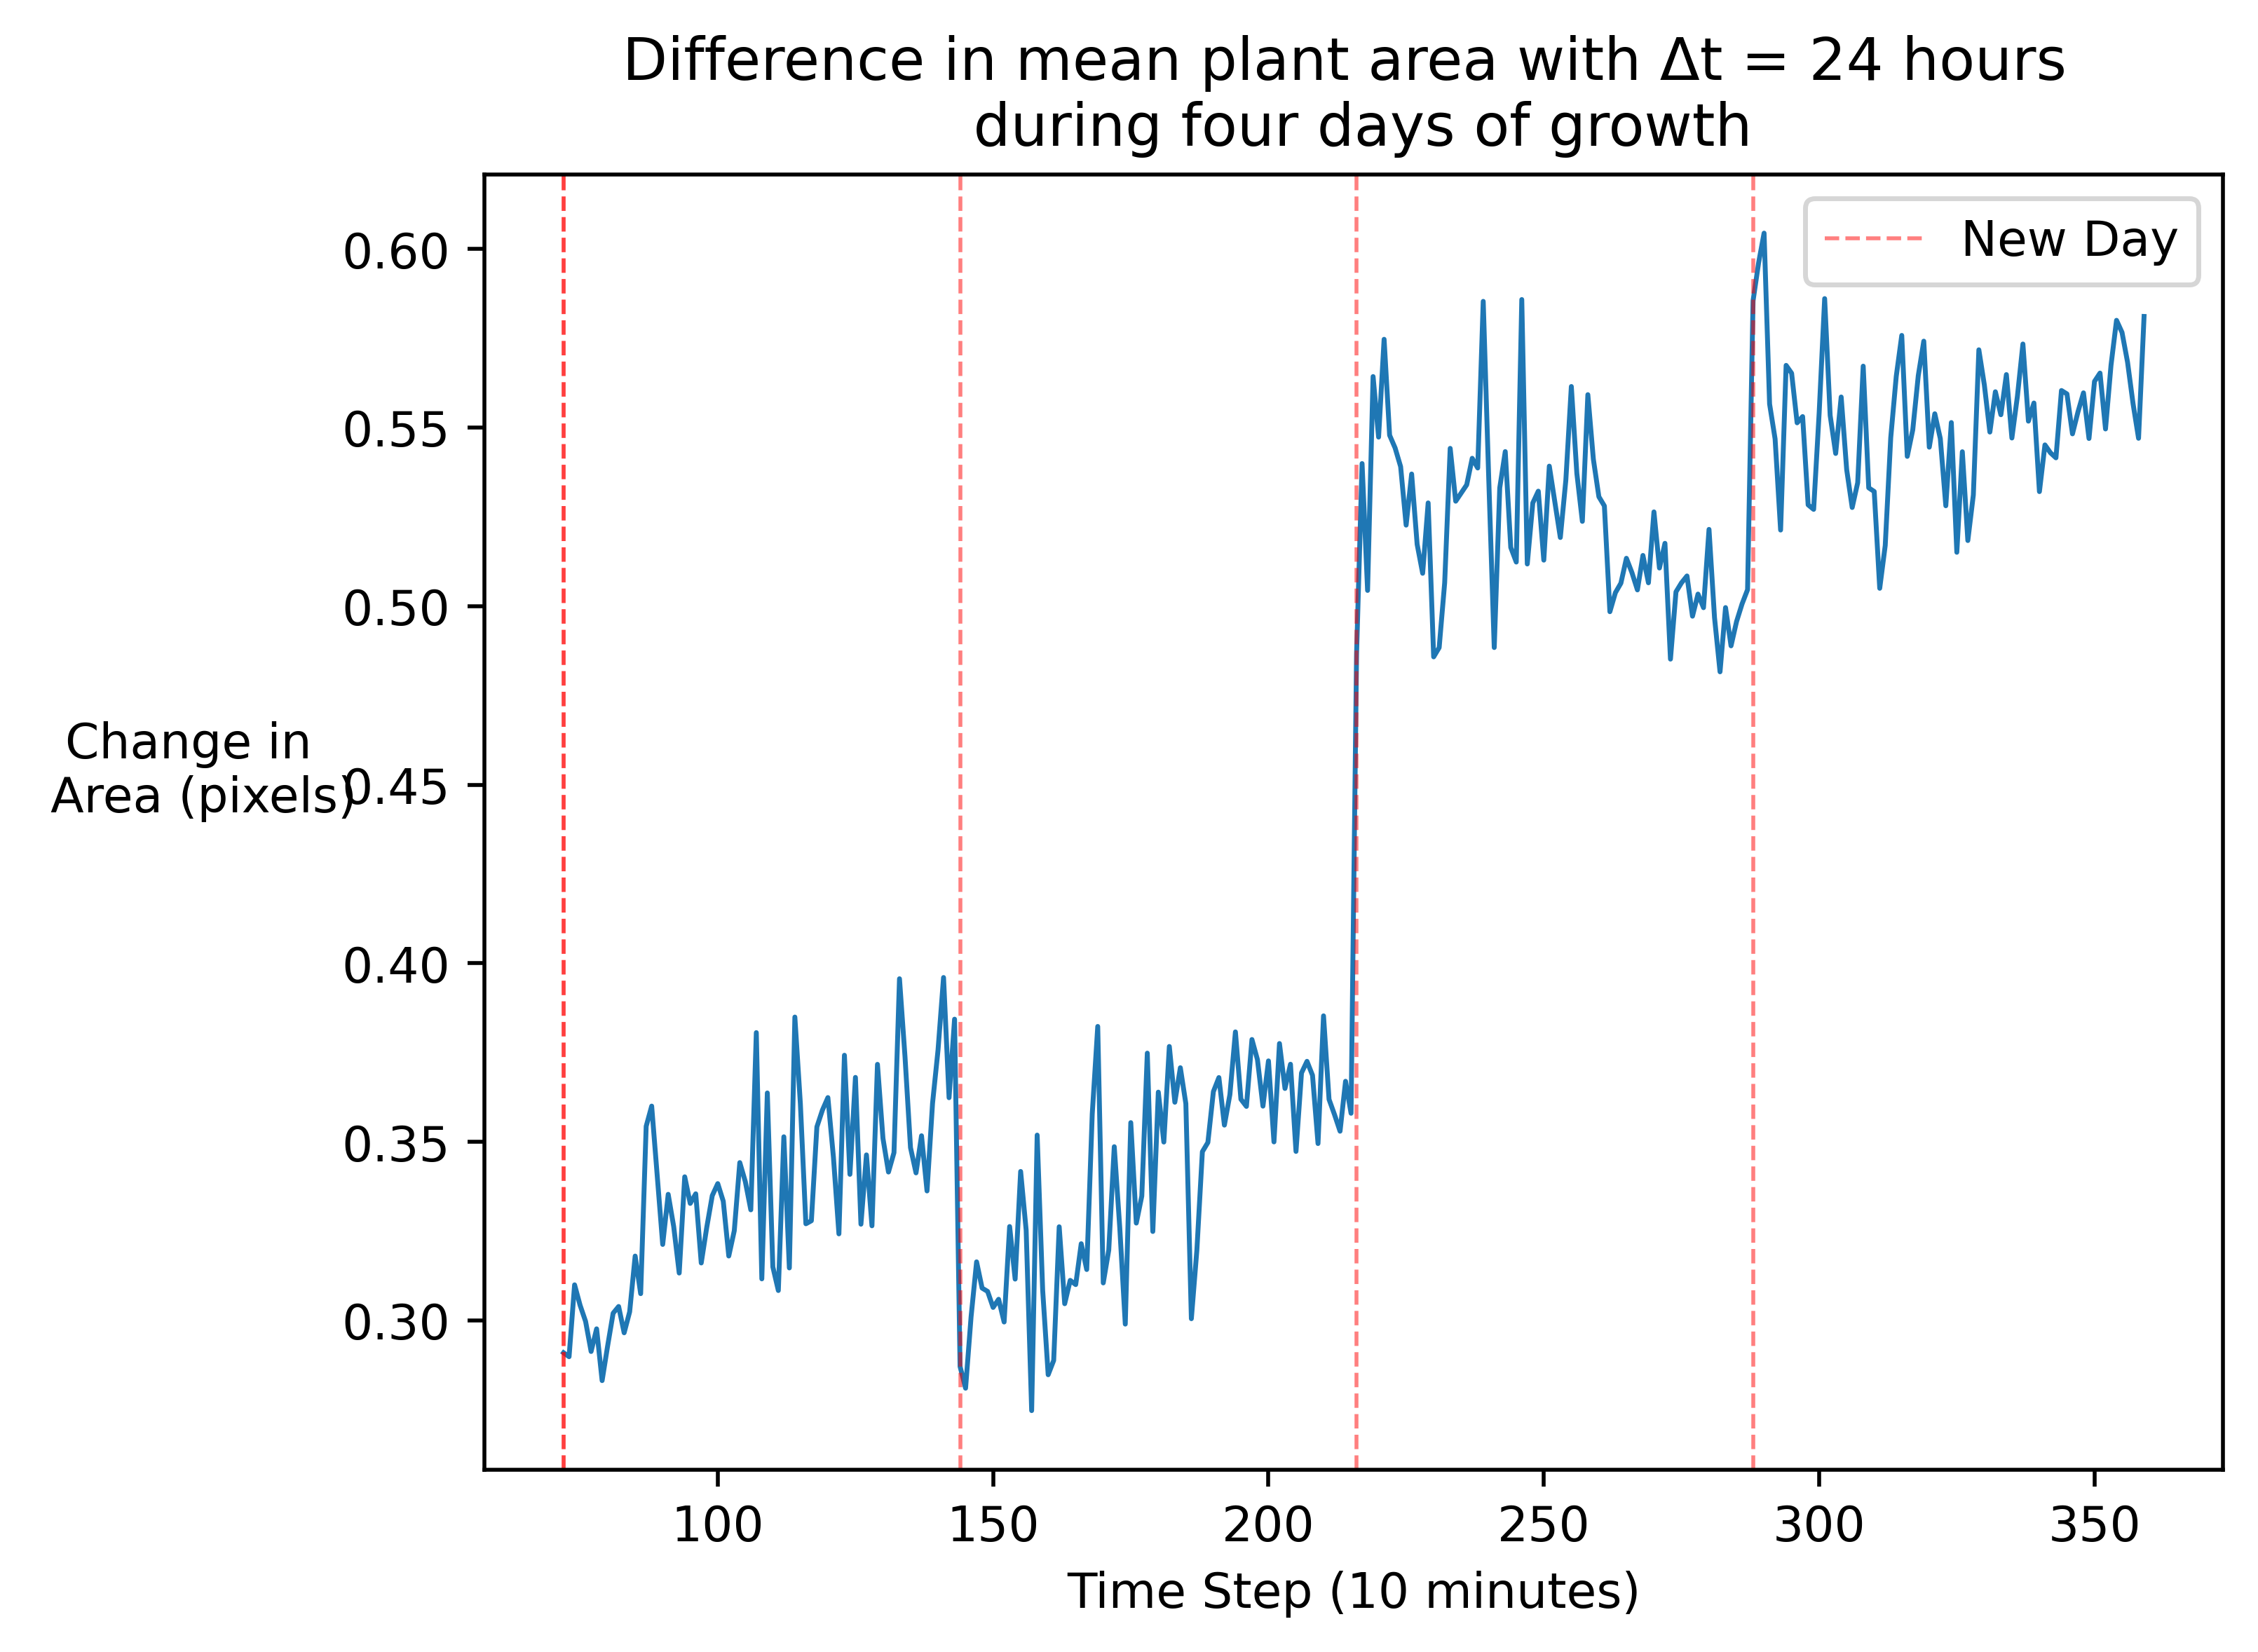

In [186]:
plt.figure(dpi=500)
#plt.ylim(-30, 30)
plt.plot(df_norm_lag['mean_lagged_delta'][0:288], linewidth=1)
for i in range(72, 360, 72):
    plt.axvline(x=i, color='red', linestyle='--', alpha=0.5, linewidth=0.8)
plt.axvline(x=72, color='red', linestyle='--', alpha=0.5, linewidth=0.8, label='New Day')
plt.xlabel('Time Step (10 minutes)')
plt.ylabel('Change in \n normalized area (pixels)', rotation=0, labelpad=30)
plt.title("Difference in mean plant normalized area with Δt = 24 hours \n during four days of growth")
plt.legend()
plt.show()

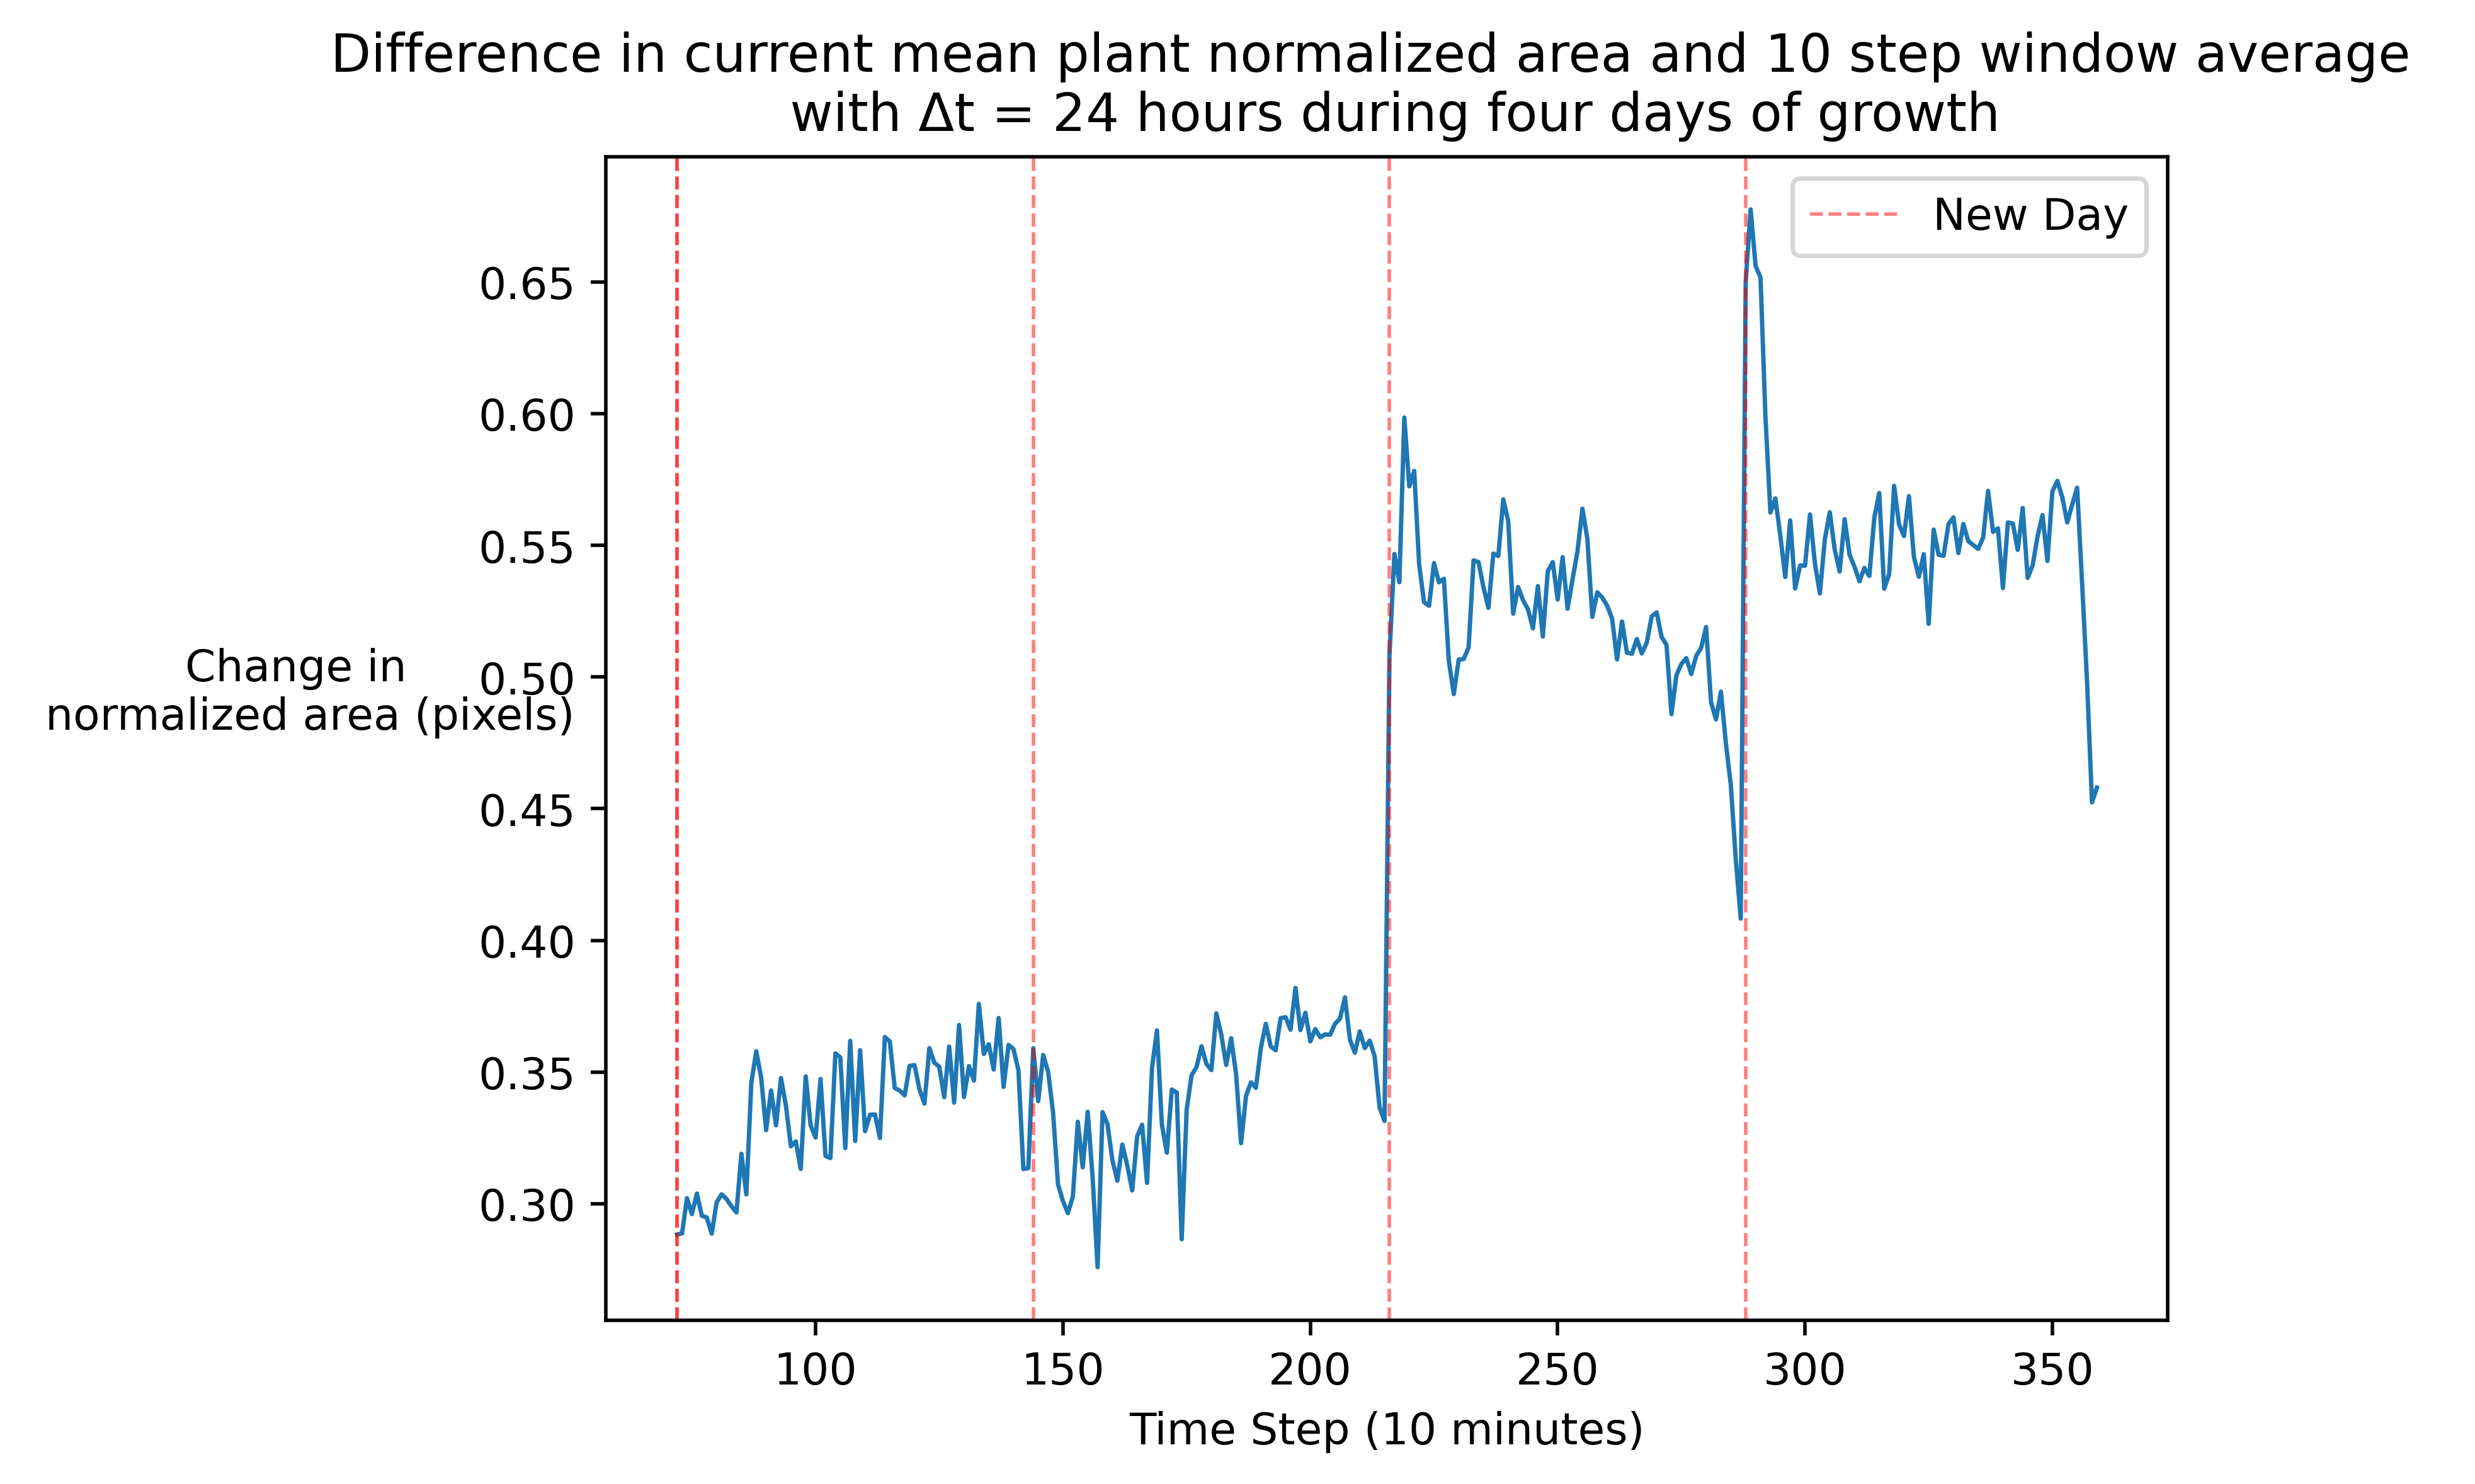

In [202]:
plt.figure(dpi=500)
#plt.ylim(-30, 30)
plt.plot(df_norm_lag['mean_window_avg_lagged_delta'][0:288], linewidth=1)
for i in range(72, 360, 72):
    plt.axvline(x=i, color='red', linestyle='--', alpha=0.5, linewidth=0.8)
plt.axvline(x=72, color='red', linestyle='--', alpha=0.5, linewidth=0.8, label='New Day')
plt.xlabel('Time Step (10 minutes)')
plt.ylabel('Change in \n normalized area (pixels)', rotation=0, labelpad=40)
plt.title("Difference in current mean plant normalized area and 10 step window average  \n with Δt = 24 hours during four days of growth")
plt.legend()
plt.show()

### EDA

Printing all rows where the change was greater than 100 (as well as the previous entry)
to see if they are at the start of new days or if something else explains this

In [188]:
#TODO Make delta_df with unnormailzed change in area
mask = delta_df['mean_change'] > 100
delta_df[mask | mask.shift(-1, fill_value=False)]

Empty DataFrame
Columns: [timestamp, plant_1_(4-12-7), plant_2_(4-12-7), plant_3_(4-12-7), plant_4_(4-12-7), plant_5_(4-12-7), plant_6_(4-12-7), plant_7_(4-12-7), plant_8_(4-12-7), plant_9_(10-6), plant_10_(10-6), plant_11_(10-6), plant_12_(10-6), plant_13_(10-6), plant_14_(10-6), plant_15_(10-6), plant_16_(10-6), plant_17_(12-2), plant_18_(12-2), plant_19_(12-2), plant_20_(12-2), plant_21_(12-2), plant_22_(12-2), plant_23_(12-2), plant_24_(12-2), plant_25_(9-11), plant_26_(9-11), plant_27_(9-11), plant_28_(9-11), plant_29_(9-11), plant_30_(9-11), plant_31_(9-11), plant_32_(9-11), plant_33_(11-13), plant_34_(11-13), plant_35_(11-13), plant_36_(11-13), plant_37_(11-13), plant_38_(11-13), plant_39_(11-13), plant_40_(11-13), plant_41_(WT), plant_42_(WT), plant_43_(WT), plant_44_(WT), plant_45_(WT), plant_46_(WT), plant_47_(WT), plant_48_(WT), plant_49_(10-6), plant_50_(12-5), plant_51_(9-5), plant_52_(4-12-7), plant_53_(10-14), plant_54_(WT), plant_55_(12-2), plant_56_(9-11), plant_57_(4-11-4), plant_58_(WT), plant_59_(11-13), plant_60_(9-11), plant_61_(12-2), plant_62_(11-19), plant_63_(10-6), plant_64_(4-12-7), median_area, mean_area, median_change, mean_change]
Index: []

[0 rows x 69 columns]

It seems that the big jumps usually happen overnight, though sometimes a large change in area also occurs in the first 10 mins of the day. Then there is the outlier period from 2024-02-25 10:30 to 2024-02-25 11:10 where we see large jumps every 10 mins (in particular two massive outliers with average change of -2039.069231 and 2049.338462). I wonder what is going on here?